# Data Preview - Carvana



U ovoj svesci bavicemo se eksplorativnom analizom podataka na trening skupu podataka sa ciljem otkrivanja zakonitosti u istim. 


In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
df = pd.read_csv("train.csv")
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,4525,0,4/13/2010,MANHEIM,2007,3,CHEVROLET,IMPALA V6,LT,4D SEDAN LT 3.5L,...,12135.0,13694.0,NaN,NaN,17675,2764,MA,7480.0,0,1974
1,9407,0,6/15/2009,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6589.0,7533.0,NaN,NaN,18880,27542,NC,4700.0,0,1389
2,13862,0,9/14/2010,MANHEIM,2007,3,FORD,ESCAPE 2WD 4C,XLS,4D CUV 2.3L XLS,...,12126.0,14046.0,NaN,NaN,52646,21075,MD,7970.0,0,920
3,11520,0,6/14/2010,MANHEIM,2006,4,FORD,TAURUS,SE,4D SEDAN SE,...,7533.0,8973.0,NaN,NaN,18880,27542,NC,5200.0,0,1053
4,2189,1,4/7/2009,ADESA,2006,3,FORD,FIVE HUNDRED 3.0L V6,SE,4D SEDAN SE,...,7267.0,8833.0,NaN,NaN,19619,45005,OH,6630.0,0,1506


6736.806328492014

### Izlazna promenljiva - IsBadBuy

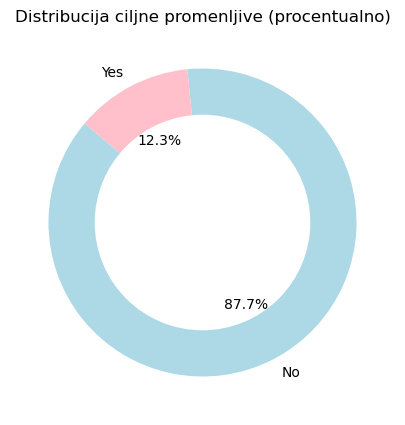

In [4]:
plt.figure(figsize=(8, 5))
counts = df['IsBadBuy'].value_counts(normalize=True) * 100  
plt.pie(counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'pink'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Distribucija ciljne promenljive (procentualno)')
plt.show()

Imamo 19 numeričkih i 15 kategoričkih atributa, izlazni atribut je IsBadBuy

Skup podataka je neizbalansiran jer ima dosta više "No" labela, tj. vozila koja su u dobrom stanju.

### RefID - ID intsanci

In [5]:
def unique_percentage(column):
    unique_values = column.nunique()  
    total_values = len(column) 
    percentage = (unique_values / total_values) * 100 
    return percentage

In [6]:
unique_percentage(df['RefId'])

100.0

Svaka vrednost u koloni je jedinstvena, necemo koristiti za predvidjanje

### Datum kupovine - PurchDate

In [7]:
unique_percentage(df['PurchDate'])

1.0100219229564673

In [8]:
datumi = pd.to_datetime(df['PurchDate'], format='%m/%d/%Y')

In [9]:
first_date = datumi.min()
last_date = datumi.max()

print(f"Prvi datum: {first_date.strftime('%d/%m/%Y')}")
print(f"Poslednji datum: {last_date.strftime('%d/%m/%Y')}")

Prvi datum: 05/01/2009
Poslednji datum: 30/12/2010


Datum prve kupovine je peti Januar 2009 godine, a posledje 30 decembar 2010 godine, dakle 2 godine razmaka izmedju kupovina, ova infromacija moze biti od koristi u toku istrazivanja ali sam atribut necemo koristiti, jer ima previse jedinstvenih vrednosti (70 posto)

### Naziv aukcije  na kojoj su kupljeni automobili - Auction

(array([0, 1, 2]),
 [Text(0, 0, 'MANHEIM'), Text(1, 0, 'OTHER'), Text(2, 0, 'ADESA')])

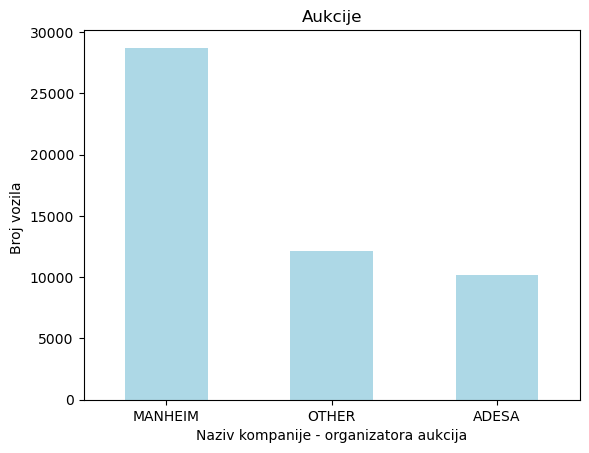

In [10]:
count_auction = df["Auction"].value_counts().plot(kind="bar", title="Aukcije",color='lightblue')
plt.xlabel('Naziv kompanije - organizatora aukcija')
plt.ylabel('Broj vozila ')
plt.xticks(rotation=0)

Sa histograma vidimo da je ubedljivo najpopularnija aukcijska kuca MANHEIM, od koje je nabavljeno vise vozila nego u druge dve kategorije zajedno. 

In [11]:
cross_auction = pd.crosstab( df.Auction, df.IsBadBuy)
cross_auction

IsBadBuy,0,1
Auction,,
ADESA,8665,1532
MANHEIM,25371,3359
OTHER,10759,1402


In [12]:
cross_auction_p = cross_auction.div(cross_auction.sum(1).astype(float), axis=0)
cross_auction_p

IsBadBuy,0,1
Auction,,
ADESA,0.849760,0.150240
MANHEIM,0.883084,0.116916
OTHER,0.884713,0.115287


Vidimo da postoji malo veca verovatnoca da je auto nabavljen preko Adese losa kupovina tj. kick  

### Starost vozila - VehYear i VehAge

Skup podataka sadrzi dva atributa koji se odnose na starost vozila. To su godiste i godine starosti vozila.

In [13]:
df['VehicleAge'].corr(df['VehYear'])

-0.9578157122805955

Vidimo da postoji jaka linearna zavisnost izmedju atributa, sto je i ocekivano. Predznak '-' oznacava da sto je manje godiste, vece su godine starosti. Dovoljno je koristiti jedan od ova dva atributa zbog multikolinearnosti. 

Text(0, 0.5, 'Broj vozila')

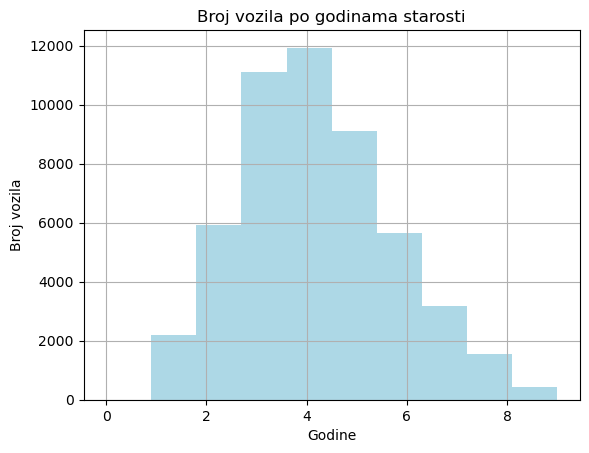

In [14]:
vehyear = df['VehicleAge'].hist(color='lightblue')
plt.title('Broj vozila po godinama starosti')
plt.xlabel('Godine')
plt.ylabel('Broj vozila')


In [15]:
df['VehicleAge'].describe()

count    51088.000000
mean         4.172780
std          1.708616
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          9.000000
Name: VehicleAge, dtype: float64

In [16]:
# Koeficijent spljostenosti
df['VehicleAge'].kurt()

-0.20235393079244357

In [17]:
# Koeficijent asimetrije
df['VehicleAge'].skew()

0.39065462321001265

Prosečna starost vozila je 4 godine. Distribucija pokazuje blagu asimetriju prema desnoj strani i spljostenost koja ukazuje na tendenciju ka normalnosti.

Text(0, 0.5, 'Broj vozila')

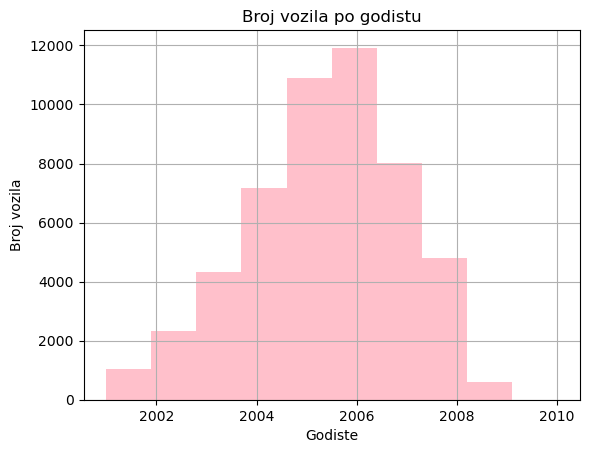

In [18]:
vehyear = df['VehYear'].hist(color='pink')
plt.title('Broj vozila po godistu')
plt.xlabel('Godiste')
plt.ylabel('Broj vozila')


In [19]:
cross_age = pd.crosstab( df.VehicleAge, df.IsBadBuy)
cross_age_p = cross_age.div(cross_age.sum(1).astype(float), axis=0)
cross_age_p

IsBadBuy,0,1
VehicleAge,,
0,1.000000,0.000000
1,0.960092,0.039908
2,0.934896,0.065104
3,0.919612,0.080388
4,0.892633,0.107367
5,0.851351,0.148649
6,0.815720,0.184280
7,0.781927,0.218073
8,0.732815,0.267185


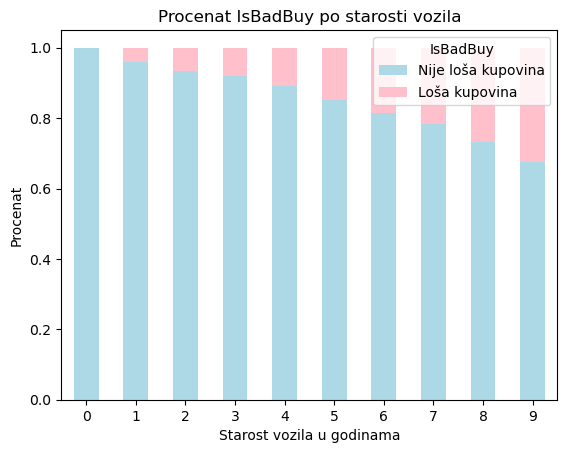

In [20]:
ax = cross_age_p.plot(kind='bar', stacked=True, color=['lightblue', 'pink'], title='Procenat IsBadBuy po starosti vozila')
plt.xlabel('Starost vozila u godinama')
plt.ylabel('Procenat')
plt.xticks(rotation=0)
plt.legend(title='IsBadBuy', labels=['Nije loša kupovina', 'Loša kupovina'])
plt.show()

Vidimo da, što je vozilo starije, značajno raste verovatnoca da vozilo ima skrivene mane.

### Proizvodjaci vozila - Make

(array([ 0.,  5., 10., 15., 20., 25.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

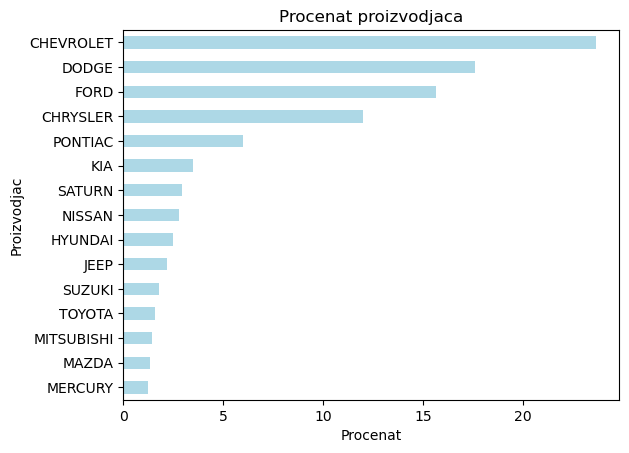

In [15]:

maker = df['Make'].value_counts(normalize=True)*100
maker[maker>1].sort_values(ascending=True).plot(kind='barh', title='Procenat proizvodjaca', color='lightblue')
plt.xlabel('Procenat')
plt.ylabel('Proizvodjac')
plt.xticks(rotation=0)

In [18]:
top_4 = maker.head(4)
top_4.sum()

68.89680551205763

In [16]:
maker.shape

(33,)

Najzastupljeniji proizvodjac je Chevrolet sa preko 20%, a prate ga drugi veliki americki proizvodjaci Dodge, Ford i Crysler. Oni zajedno cine 68.93 procenata svih vozila.

In [23]:
cross_maker = pd.crosstab( df.Make, df.IsBadBuy)


In [24]:
cross_maker_p = cross_maker.div(cross_maker.sum(1).astype(float), axis=0)
cross_make_p_sorted = cross_maker_p.sort_values(by=1, ascending=True)

In [25]:
combined = pd.concat([cross_maker, cross_make_p_sorted], axis=1, keys=['Count', 'Percentage'])
combined_sorted = combined.sort_values(by=('Percentage', 1), ascending=True)
combined_sorted

Count       Percentage          
IsBadBuy          0     1          0         1
Make                                          
VOLVO            29     0   1.000000  0.000000
TOYOTA SCION      1     0   1.000000  0.000000
HUMMER            1     0   1.000000  0.000000
CADILLAC         21     2   0.913043  0.086957
SCION            77     8   0.905882  0.094118
CHEVROLET     10929  1154   0.904494  0.095506
TOYOTA          737    80   0.902081  0.097919
DODGE          8082   921   0.897701  0.102299
ISUZU            76     9   0.894118  0.105882
KIA            1583   207   0.884358  0.115642
MITSUBISHI      643    85   0.883242  0.116758
HONDA           303    41   0.880814  0.119186
PONTIAC        2688   373   0.878144  0.121856
HYUNDAI        1107   160   0.873717  0.126283
CHRYSLER       5350   776   0.873327  0.126673
GMC             413    63   0.867647  0.132353
VOLKSWAGEN       85    14   0.858586  0.141414
FORD           6766  1220   0.847233  0.152767
SUZUKI          776   140   0.847162  0.152838
SATURN         1267   231   0.845794  0.154206
BUICK           417    78   0.842424  0.157576
NISSAN         1195   224   0.842142  0.157858
JEEP            926   180   0.837251  0.162749
MERCURY         524   108   0.829114  0.170886
MAZDA           543   125   0.812874  0.187126
SUBARU           19     5   0.791667  0.208333
OLDSMOBILE      130    36   0.783133  0.216867
ACURA            15     6   0.714286  0.285714
LINCOLN          47    20   0.701493  0.298507
INFINITI         22    11   0.666667  0.333333
MINI             11     7   0.611111  0.388889
LEXUS            12     8   0.600000  0.400000
PLYMOUTH          0     1   0.000000  1.000000

U tabeli su prikazani proizvodjaci automobila, njihova ucestalosost u setu podataka i procenti onih vozila koji su oznaceni kao KICK

Najvise nas interesuju oni proizovdjaci koji su zastupljeni, a imaju visoke ili niske procente za kick u odnosu na globalni odnos (87.7-12.3)

Chevrolet je najzastupljeniji proizvodjac, a ima i najmanji procenat kikova u odnosu na druge proizvodjace koji ucestvuju sa vise od 1% u setu.
Najlosije su se pokazali Ford, Nissan i Jeep. Daljom analizom cemo se fokusirati na ove brendove, kako bismo otkrili modele koji su najlosiji.


### MODELI automobila

In [26]:
model = df['Model'].value_counts(normalize=True)
len(model)

1014

In [27]:
num_models_per_make = df.groupby('Make')['Model'].nunique().sort_values()
num_models_per_make


Make
TOYOTA SCION      1
PLYMOUTH          1
HUMMER            1
VOLVO             2
SUBARU            4
MINI              4
CADILLAC          7
VOLKSWAGEN        9
SCION            10
ISUZU            10
ACURA            10
LEXUS            11
INFINITI         13
OLDSMOBILE       13
LINCOLN          18
HONDA            28
BUICK            32
SUZUKI           33
MERCURY          34
JEEP             35
MITSUBISHI       35
GMC              37
MAZDA            42
SATURN           42
KIA              43
HYUNDAI          44
CHRYSLER         47
PONTIAC          51
NISSAN           52
TOYOTA           67
DODGE            71
FORD            100
CHEVROLET       109
Name: Model, dtype: int64

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5')])

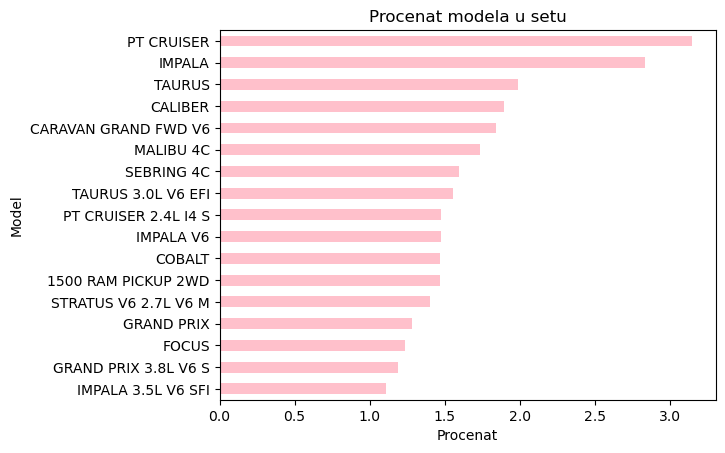

In [28]:
models = df['Model'].value_counts(normalize=True)*100
models[models>1].sort_values(ascending=True).plot(kind='barh', title='Procenat modela u setu', color='pink')
plt.xlabel('Procenat')
plt.ylabel('Model')
plt.xticks(rotation=0)

### TRIM - paket opreme

In [29]:
trim = df['Trim'].value_counts()
len(trim)
trim.head(6)

Trim
Bas    9800
LS     7130
SE     6521
SXT    2696
LT     2468
LX     1692
Name: count, dtype: int64

In [30]:
pd.set_option('display.max_rows', 134)

# Prikaz svih vrednosti u 'Trim' koloni
trim = df['Trim'].value_counts()
print(trim)
# Vraćanje na podrazumevani prikaz redova
pd.reset_option('display.max_rows')


Trim
Bas    9800
LS     7130
SE     6521
SXT    2696
LT     2468
LX     1692
Tou    1582
EX     1530
SEL     969
XLT     952
GLS     940
SLT     843
Spo     842
Lim     668
Lar     609
GT      573
ST      565
XLS     549
2       538
ES      500
SES     434
ZX4     424
S       422
LE      395
SLE     395
Cla     324
i       323
XL      321
Nor     312
GL      288
STX     214
150     212
GS      211
Cus     194
ZX3     176
CE      169
CX      168
Adv     153
Edd     149
s       149
XE      133
3       128
1       114
L30     100
Edg      82
LXi      80
L20      75
CXL      70
ZX5      64
W/T      63
SV6      59
GTP      54
SX       52
SS       50
SR5      43
ZTS      42
Pre      42
Z71      40
SL       40
DX       37
Her      35
R/T      33
DE       29
Ren      28
Lux      28
SL1      28
LW3      26
GTC      26
ZXW      24
SL2      22
GXE      22
Sta      18
Val      18
Spy      17
Plu      17
VP       15
XR       14
SC2      14
Exe      14
GLE      13
X        12
ZX2      11
Max      11

U setu imamo 134 razlicitih vrednosti za varijablu trim. Svaki model ima svoje oznake za nivo paketa opreme, sto je mnogo tesko za razumevanje i enkodiranje. 
Daljim istrazivanjem otkrivamo da Bas oznacava osnovni (Base) nivo opreme, ST i SE su sportske verzije, LS je najcesce osnovni nivo kod Chevroleta, SXT je srednji nivo kod Dodge-a itd. 
Moguce je podeliti ove kategorije na osnove i unapredjene.

In [31]:
cross_trim = pd.crosstab( df.Trim, df.IsBadBuy)
cross_trim_p = cross_trim.div(cross_trim.sum(1).astype(float), axis=0)

combined = pd.concat([cross_trim, cross_trim_p], axis=1, keys=['Count', 'Percentage'])
combined_sorted = combined.sort_values(by=('Count', 0), ascending=False)
combined_sorted.head()

Count       Percentage          
IsBadBuy     0     1          0         1
Trim                                     
Bas       8580  1220   0.875510  0.124490
LS        6520   610   0.914446  0.085554
SE        5740   781   0.880233  0.119767
SXT       2418   278   0.896884  0.103116
LT        2296   172   0.930308  0.069692

In [32]:
df[['Trim','Make']]

,Trim,Make
0,LT,CHEVROLET
1,SXT,DODGE
2,XLS,FORD
3,SE,FORD
4,SE,FORD
...,...,...
51083,Bas,CHRYSLER
51084,EX,KIA
51085,LT,CHEVROLET
51086,Bas,PONTIAC


In [33]:
def categorize_trim(trim):
    # Definišemo kategorije na osnovu trimova
    basic_trims = {"W/T","Nor","i","Bas","Cla","1","ES", "L", "S", "SE", "LX", "EX", "LE", "GLS", "DX", "XE", "GL", "SXT", "CX", "150", "ZX3", "ZX4", "ZX5", "XL", "LXi", "ZXW", "GXE"}
    mid_range_trims = {"L30","SLE","SES","LS", "LT", "SEL", "XLT", "XLS", "SLT", "CXL", "Adv", "Cus", "SV6", "CE", "Tou", "CXS", "GS", "STX","2"}
    sport_trims = {"s","GT", "ST", "R/T", "GTS", "SS", "Spo", "GTP", "ZTS", "Z71", "ZX2", "SVT", "XRS", "FX4"}
    luxury_trims = {"Lim", "Lar", "Lux", "LTZ", "Den", "GLS", "GTC", "L10", "L20", "Pro", "Max", "OZ"}
    special_trims = {"Edg","3", "Edd", "Z24", "Har", "LL", "JLX", "JLS", "Hyb", "Ent", "Ral", "ZR2", "Spe", "Ove", "RS", "Hig", "3 R", "Cin", "Exe", "Val", "Sta", "VP", "Pre", "Spy", "SC2", "SC1", "Spy", "XR", "eC", "Out", "Ult", "Maz"}

    # Podela u kategorije
    if trim in basic_trims:
        return 'Basic'
    elif trim in mid_range_trims:
        return 'Mid-Range'
    elif trim in sport_trims:
        return 'Sport'
    elif trim in luxury_trims:
        return 'Luxury'
    elif trim in special_trims:
        return 'Special'
    else:
        return 'Unknown'

In [35]:
df['TrimCategory'] = df['Trim'].apply(categorize_trim)

In [38]:
analyze_bad_buy(df,'TrimCategory')

Count       Percentage          
IsBadBuy          0     1          0         1
TrimCategory                                  
Special         464    99   0.824156  0.175844
Unknown        1722   337   0.836328  0.163672
Luxury         1223   237   0.837671  0.162329
Sport          2003   381   0.840185  0.159815
Basic         24191  3395   0.876930  0.123070
Mid-Range     15192  1844   0.891759  0.108241

In [39]:
from scipy import stats

cross_trim_cat = pd.crosstab(df['TrimCategory'], df['IsBadBuy'])
chi2_trim, p_trim, dof_trim, expected_trim = stats.chi2_contingency(cross_trim_cat)
print(f"Vrednost statistike: {chi2_trim}, p-vrednost: {p_trim}, Stepeni slobode: {dof_trim}")
alpha = 0.05
if p_trim < alpha:
    print("Postoji znacajna statisticka zavisnost izmedju vrednosti za atribute Trim Category i IsBadBuy.")
else:
    print("Nema statisticki znacajne zavisnosti izmedju vrednosti za atribute Trim Category i IsBadBuy.")

Vrednost statistike: 131.25903364649102, p-vrednost: 1.2863622709259044e-26, Stepeni slobode: 5
Postoji znacajna statisticka zavisnost izmedju vrednosti za atribute Trim Category i IsBadBuy.


Analizirali smo sta koji Trim level predstavlja i podelili smo ih na nekoliko kategorija u skladu sa pretpodstavkom od ranije. 
Sport modeli zaista pokazuju veci nivo habanja od osnovih, a izdvojile su se jos neke kategorije koje imaju veci procenat od osnovih automobila.

### Submodel

In [40]:
submodel = df['SubModel'].value_counts()
submodel.head(20)

SubModel
4D SEDAN                10708
4D SEDAN LS              3302
4D SEDAN SE              2694
4D WAGON                 1555
MINIVAN 3.3L              898
4D SUV 4.2L LS            818
4D SEDAN LT               807
4D SEDAN SXT FFV          787
2D COUPE                  761
4D SEDAN LX               755
4D SEDAN EX               686
4D SEDAN SEL              598
4D SEDAN LT 3.5L          597
4D SEDAN LEVEL 2          468
4D SPORT                  454
4D SEDAN LS 3.5L FFV      397
4D SEDAN SE1              393
4D SUV 4.2L               375
4D SEDAN S                365
4D SEDAN ES               355
Name: count, dtype: int64

In [41]:
len(submodel)

803

In [3]:
def submodel(df):
    # Kombinujemo sve submodele u jednu kolonu, gde će vrednost biti naziv submodela ili "OTHER" ako nije pronađen nijedan od definisanih submodela
    conditions = [
        df['SubModel'].str.contains('SEDAN', case=False, na=False),
        df['SubModel'].str.contains('CAB', case=False, na=False),
        df['SubModel'].str.contains('CUV', case=False, na=False),
        df['SubModel'].str.contains('MINIVAN', case=False, na=False),
        df['SubModel'].str.contains('UTILITY', case=False, na=False),
        df['SubModel'].str.contains('SPORT', case=False, na=False),
        df['SubModel'].str.contains('PASSENGER', case=False, na=False),
        df['SubModel'].str.contains('SUV', case=False, na=False),
        df['SubModel'].str.contains('WAGON', case=False, na=False),
        df['SubModel'].str.contains('CONVERTIBLE', case=False, na=False),
        df['SubModel'].str.contains('HATCHBACK', case=False, na=False)
    ]

    choices = [
        'SEDAN', 'CAB', 'CUV', 'MINIVAN', 'UTILITY', 'SPORT', 
        'PASSENGER', 'SUV', 'WAGON', 'CONVERTIBLE', 'HATCHBACK'
    ]
    
    df['SubModel_Category'] = np.select(conditions, choices, default='OTHER')

    return df


In [11]:
analyze_bad_buy(df,'SubModel_Category')


Count       Percentage          
IsBadBuy               0     1          0         1
SubModel_Category                                  
UTILITY             1298   275   0.825175  0.174825
CONVERTIBLE          282    56   0.834320  0.165680
OTHER               1636   322   0.835546  0.164454
HATCHBACK            135    24   0.849057  0.150943
SUV                 4840   740   0.867384  0.132616
PASSENGER           1389   199   0.874685  0.125315
CUV                 1073   152   0.875918  0.124082
SPORT               1008   141   0.877285  0.122715
MINIVAN             2033   282   0.878186  0.121814
WAGON               2531   340   0.881574  0.118426
CAB                 2388   316   0.883136  0.116864
SEDAN              26182  3446   0.883691  0.116309

In [42]:
colors = df['Color'].value_counts()
len(colors)

16

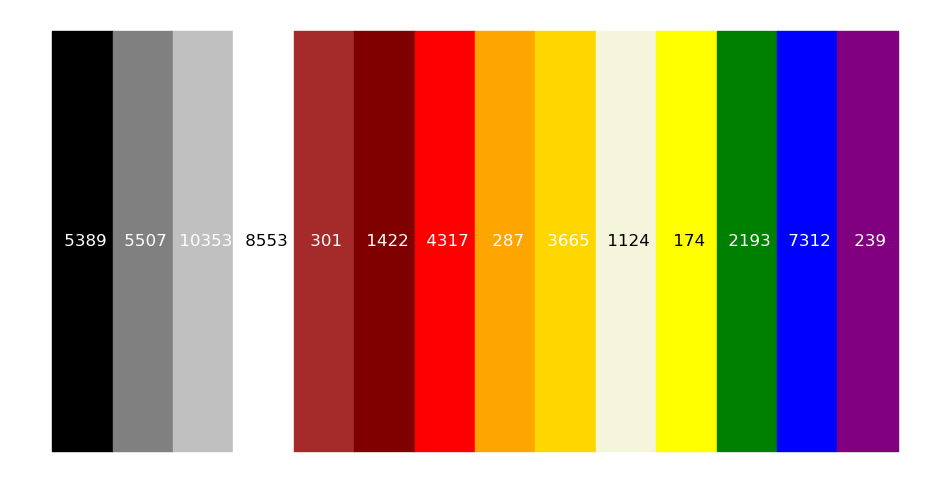

In [43]:
from colorsys import rgb_to_hsv 
import matplotlib.colors as mcolors
color_counts = df['Color'].value_counts()



# Funkcija za sortiranje boja po hue vrednostima
def sort_colors_by_hue(colors):
    def color_key(color):
        r, g, b = mcolors.to_rgb(color)
        return rgb_to_hsv(r, g, b)
    
    return sorted(colors, key=color_key)

# Filtriranje i sortiranje boja
valid_colors = [color for color in color_counts.index if color.lower() in mcolors.CSS4_COLORS]
sorted_colors = sort_colors_by_hue(valid_colors)

# Postavljanje dimenzija figure
plt.figure(figsize=(12, 6))  # Povećali smo širinu figure

bar_width = 1.5  # Povećali smo širinu kvadrata

# Kreiranje grafika sa sortiranim bojama
for i, color in enumerate(sorted_colors):
    count = color_counts[color]
    
    # Postavljamo boju teksta na crnu za svetle boje, a belu za ostale
    text_color = 'black' if color.lower() in ['white', 'beige', 'yellow'] else 'white'
    
    plt.fill_between([i * bar_width, (i + 1) * bar_width], 0, 1, color=color)  # Proširili smo kvadrate
    plt.text(i * bar_width + bar_width / 2, 0.5, f' {count}', ha='center', va='center', color=text_color, fontsize=12)  # Smanjili smo veličinu fonta

# Sakrivamo ose
plt.axis('off')

# Prikazujemo grafikon
plt.show()

In [44]:
cross_color = pd.crosstab( df.Color, df.IsBadBuy)
cross_color_p = cross_color.div(cross_color.sum(1).astype(float), axis=0)

combined = pd.concat([cross_color, cross_color_p], axis=1, keys=['Count', 'Percentage'])
combined_sorted = combined.sort_values(by=('Percentage', 1), ascending=False)
combined_sorted.head(16)

Count       Percentage          
IsBadBuy      0     1          0         1
Color                                     
NOT AVAIL    47    16   0.746032  0.253968
PURPLE      205    34   0.857741  0.142259
GOLD       3158   507   0.861664  0.138336
BEIGE       969   155   0.862100  0.137900
MAROON     1232   190   0.866385  0.133615
RED        3745   572   0.867501  0.132499
YELLOW      151    23   0.867816  0.132184
GREEN      1907   286   0.869585  0.130415
BROWN       262    39   0.870432  0.129568
OTHER       161    23   0.875000  0.125000
WHITE      7490  1063   0.875716  0.124284
SILVER     9070  1283   0.876075  0.123925
BLUE       6474   838   0.885394  0.114606
GREY       4876   631   0.885419  0.114581
BLACK      4780   609   0.886992  0.113008
ORANGE      264    23   0.919861  0.080139

Ne vidi se nikakva znacajna razlika u distribuciji prema ciljnoj promenljivoj, takodje boja nije karakteristika po kojoj zelimo da donosimo odluku jer smatramo da ni na koji nacin ne utice na kvalitet i mehanicko stanje vozila.

### Transmission  - Tip menjaca

Text(0, 0.5, 'Broj vozila')

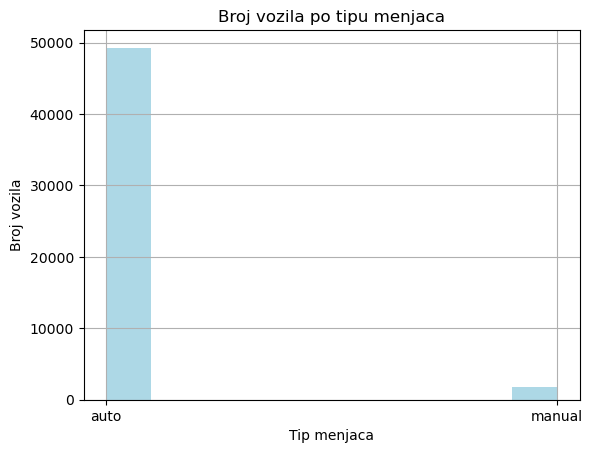

In [45]:
trans = df['Transmission'].str.lower().hist(color='lightblue')
plt.title('Broj vozila po tipu menjaca')
plt.xlabel('Tip menjaca')
plt.ylabel('Broj vozila')
## primetili smo da su neki podaci za manual zapisani malim, a neki velikim slovima, pa smo ih prikazali kao jedno

In [46]:
cross_trans = pd.crosstab( df.Transmission, df.IsBadBuy)
cross_trans_p = cross_trans.div(cross_trans.sum(1).astype(float), axis=0)

combined = pd.concat([cross_trans, cross_trans_p], axis=1, keys=['Count', 'Percentage'])
combined_sorted = combined.sort_values(by=('Percentage', 1), ascending=False)
combined_sorted

Count       Percentage          
IsBadBuy          0     1          0         1
Transmission                                  
AUTO          43203  6072   0.876773  0.123227
MANUAL         1587   220   0.878251  0.121749
Manual            1     0   1.000000  0.000000

Primecujemo da su procentualno podjednako zastupljena losa vozila u obe kategorije, kao i da je mnogo vise automatika.

### Točkovi - ID i naziv tipa tockova

In [47]:
unique_percentage(df['WheelTypeID'])

0.007829627309740057

In [48]:
df['WheelTypeID'].value_counts()

WheelTypeID
1.0    25293
2.0    23060
3.0      535
0.0        4
Name: count, dtype: int64

In [49]:
df['WheelType'].value_counts()

WheelType
Alloy      25293
Covers     23060
Special      535
Name: count, dtype: int64

In [50]:
df[['WheelTypeID','WheelType']].head(20)

,WheelTypeID,WheelType
0,1.0,Alloy
1,2.0,Covers
2,1.0,Alloy
3,1.0,Alloy
4,NaN,NaN
5,2.0,Covers
6,2.0,Covers
7,1.0,Alloy
8,1.0,Alloy
9,2.0,Covers


In [51]:
df.loc[df['WheelTypeID']==0.0,'WheelType']

22720    NaN
27072    NaN
27355    NaN
28405    NaN
Name: WheelType, dtype: object

Wheel Type ID je id tipa tockova, ID = 0 su NaN vrednosti tipa, 1.0 = Alloy, 2.0 = Covers, 3.0 = Special

Text(0, 0.5, 'Broj vozila')

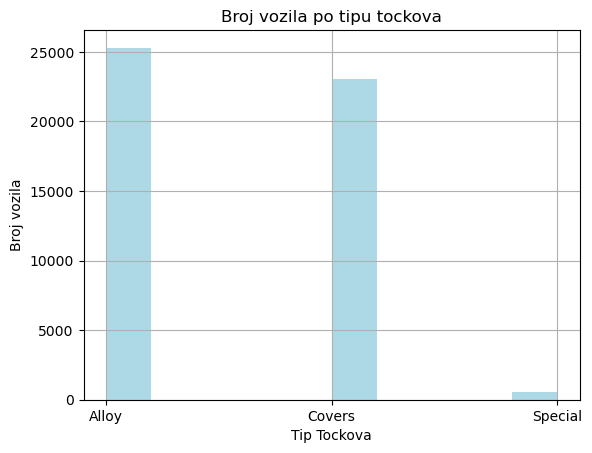

In [52]:
wheels = df['WheelType'].hist(color='lightblue')
plt.title('Broj vozila po tipu tockova')
plt.xlabel('Tip Tockova')
plt.ylabel('Broj vozila')


In [53]:
c=pd.crosstab(df.Make, df.WheelType)
c

WheelType,Alloy,Covers,Special
Make,,,
ACURA,17,0,0
BUICK,234,227,5
CADILLAC,21,0,1
CHEVROLET,5146,6366,112
CHRYSLER,2172,3586,85
DODGE,3735,4852,98
FORD,5722,1822,77
GMC,414,36,8
HONDA,174,147,2


In [54]:
df.loc[df['WheelType']=='Special','Auction']

201      MANHEIM
203      MANHEIM
236      MANHEIM
291      MANHEIM
300      MANHEIM
          ...   
50439    MANHEIM
50606    MANHEIM
50645      ADESA
50653      ADESA
50655      ADESA
Name: Auction, Length: 535, dtype: object

In [55]:
cross_wheels = pd.crosstab( df.WheelType, df.IsBadBuy)
cross_wheels_p = cross_wheels.div(cross_wheels.sum(1).astype(float), axis=0)

combined = pd.concat([cross_wheels, cross_wheels_p], axis=1, keys=['Count', 'Percentage'])
combined_sorted = combined.sort_values(by=('Percentage', 1), ascending=False)
combined_sorted

Count       Percentage          
IsBadBuy       0     1          0         1
WheelType                                  
Special      464    71   0.867290  0.132710
Alloy      22480  2813   0.888783  0.111217
Covers     21204  1856   0.919514  0.080486

Vidimo da procentualno postoji razlika izmedju Covers i Alloy, 8% naspram 11%, , uradicemo Hi kvadrat test

In [56]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['WheelType'], df['IsBadBuy'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Hi-kvadrat statistika:", chi2_stat)
print("P-vrednost:", p_val)
print("Broj stepeni slobode:", dof)
print("Očekivane frekvencije:\n", expected)


alpha = 0.05
if p_val < alpha:
    print("Postoji statistički značajna razlika između varijabli (p < 0.05)")
else:
    print("Nema statistički značajne razlike između varijabli (p >= 0.05)")

Hi-kvadrat statistika: 138.00460630894702
P-vrednost: 1.0781532624580782e-30
Broj stepeni slobode: 2
Očekivane frekvencije:
 [[22840.68409426  2452.31590574]
 [20824.18753068  2235.81246932]
 [  483.12837506    51.87162494]]
Postoji statistički značajna razlika između varijabli (p < 0.05)


### Kilometraza - VehOdo

Predstavlja broj predjenih kilometara koje je vozilo preslo. Carvana navodi da se ovaj podatak moze lazirati, te treba obratiti posebnu paznju.

In [57]:
df['VehOdo'].describe()

count     51088.000000
mean      71512.059681
std       14576.086882
min        4825.000000
25%       61920.500000
50%       73369.500000
75%       82448.750000
max      115717.000000
Name: VehOdo, dtype: float64

<Axes: ylabel='Density'>

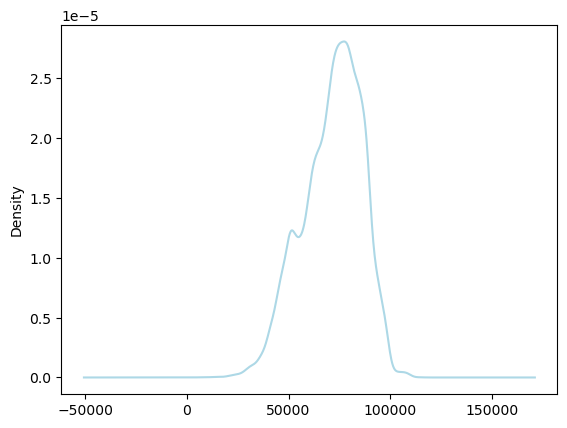

In [58]:
df['VehOdo'].plot(kind="kde", color = 'lightblue')

In [59]:
df['VehOdo'].skew()

-0.45626897791775994

In [60]:
df['VehOdo'].kurt()

-0.1887254171617263

Izračunata asimetrija je približno -0.453. Negativna asimetrija ukazuje na to da postoji veći broj manjih vrednosti u raspodeli, odnosno, rep raspodele je na levoj strani. Dakle, većina vozila ima nižu kilometražu, ali postoji manji broj vozila sa višom kilometražom.
Izračunata kurtosis je približno -0.198. Kurtosis blizu nule ukazuje na to da raspodela ima sličan oblik kao normalna raspodela. Negativna vrednost kurtosis može sugerisati da raspodela ima "ravnije" vrhove u odnosu na normalnu raspodelu, što ukazuje na relativno ujednačenu raspodelu vrednosti.

In [61]:
import scipy.stats as stats
sample = df['VehOdo'].sample(5000, random_state=42)
shapiro_test_result = stats.shapiro(sample)
print(shapiro_test_result)

ShapiroResult(statistic=0.9808112978935242, pvalue=1.7491614997072458e-25)


Sapirovim testom zakljucujemo da kilometraza ne podleze normalnoj raspodeli

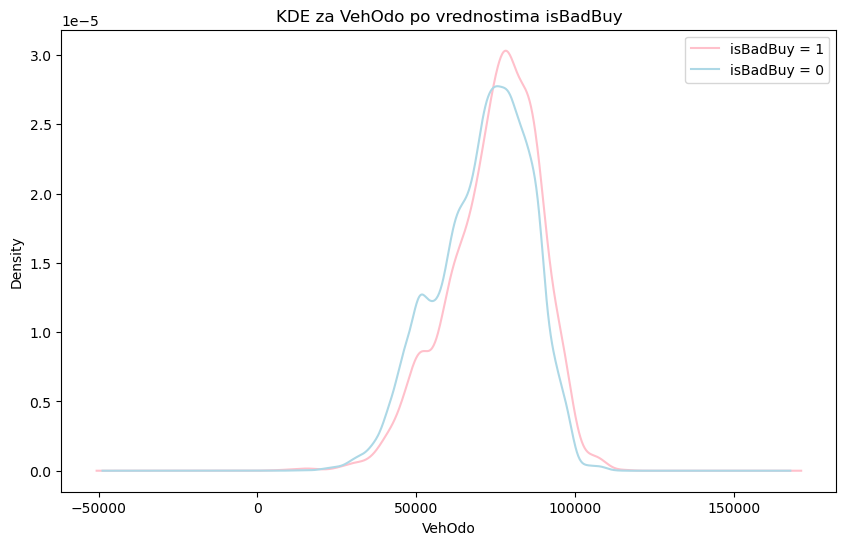

In [62]:
plt.figure(figsize=(10, 6))

df[df['IsBadBuy'] == 1]['VehOdo'].plot(kind='kde', color='pink', label='isBadBuy = 1')
df[df['IsBadBuy'] == 0]['VehOdo'].plot(kind='kde', color='lightblue', label='isBadBuy = 0')

plt.xlabel('VehOdo')
plt.ylabel('Density')
plt.title('KDE za VehOdo po vrednostima isBadBuy')
plt.legend()

plt.show()

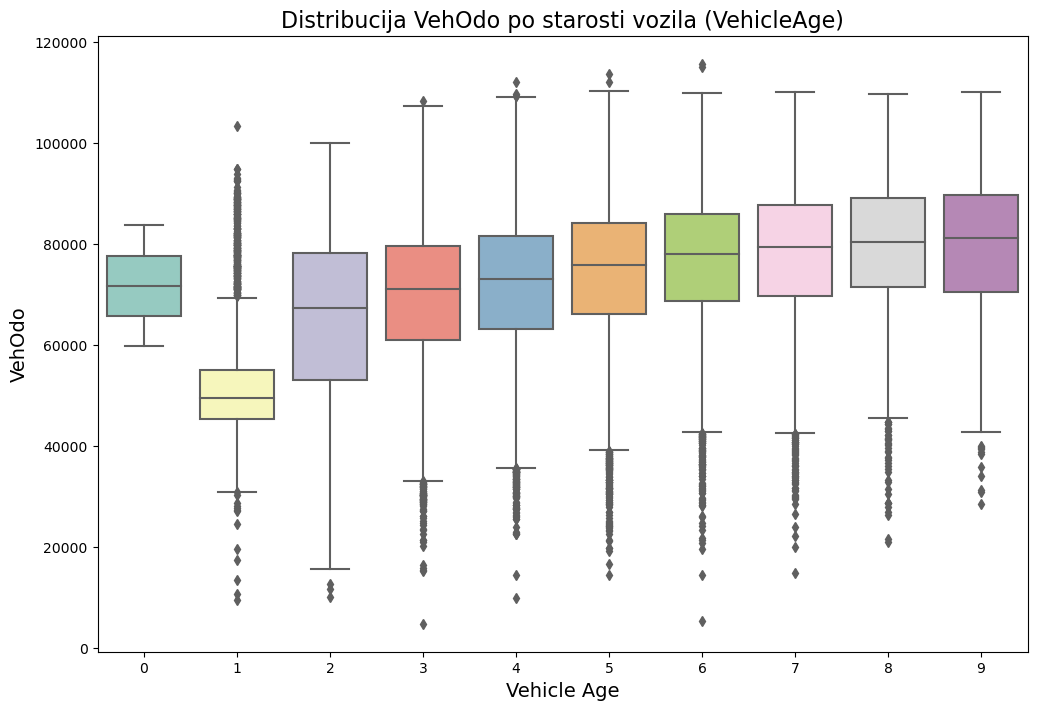

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='VehicleAge', y='VehOdo', data=df, palette="Set3")

# Dodavanje naslova i labela
plt.title('Distribucija VehOdo po starosti vozila (VehicleAge)', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('VehOdo', fontsize=14)

# Prikazivanje grafikona
plt.show()

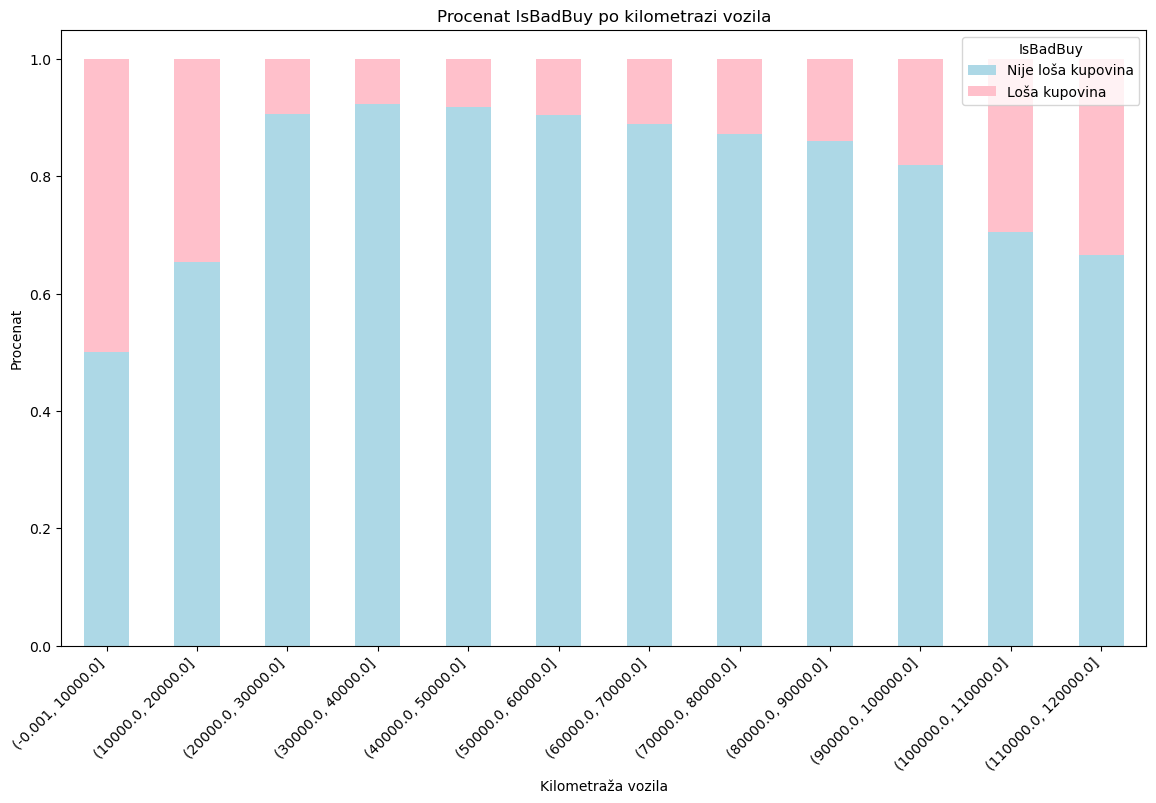

In [66]:
cross_odo = pd.crosstab(df.OdoBin, df.IsBadBuy)
cross_odo_p = cross_odo.div(cross_odo.sum(1).astype(float), axis=0)

plt.figure(figsize=(14, 8)) 

ax = cross_odo_p.plot(kind='bar', stacked=True, color=['lightblue', 'pink'], title='Procenat IsBadBuy po kilometrazi vozila', ax=plt.gca())

plt.xlabel('Kilometraža vozila')
plt.ylabel('Procenat')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='IsBadBuy', labels=['Nije loša kupovina', 'Loša kupovina'])

plt.show()

Kontingentna tabela sa brojem instanci:
IsBadBuy                0     1  Total Instances
QuantileBin                                     
(4824.999, 58754.4]  9327   891            10218
(58754.4, 69509.0]   9087  1133            10220
(69509.0, 76945.4]   8985  1230            10215
(76945.4, 84414.2]   8837  1380            10217
(84414.2, 115717.0]  8559  1659            10218
Procenat po binu:
IsBadBuy                    0         1
QuantileBin                            
(4824.999, 58754.4]  0.912801  0.087199
(58754.4, 69509.0]   0.889139  0.110861
(69509.0, 76945.4]   0.879589  0.120411
(76945.4, 84414.2]   0.864931  0.135069
(84414.2, 115717.0]  0.837639  0.162361


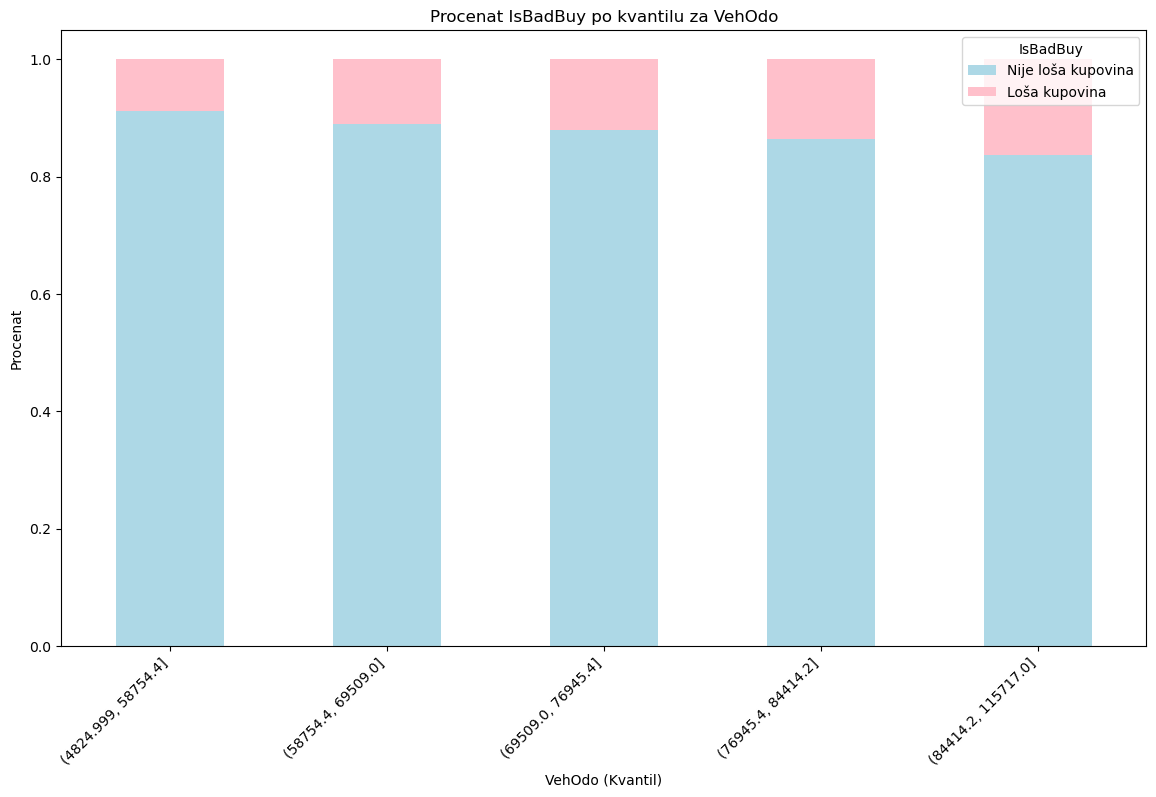

In [144]:
plot_quantile_bin_percentage(df,'VehOdo',5,'IsBadBuy')

Zapazamo da, sto je vozilo starije, veca mu je kilometraza,a takodje vidimo da postoji veliki broj autlajera, uglavnom sa donje strane raspodele - to su vozila koja imaju manju kilometrazu nego sto je ocekivano, sto moze biti upitno.
Takodje, samo dva vozila imaju starost od 0, sto cemo srediti


In [146]:
Odo_Year_mean=df['VehOdo'].groupby(df['VehicleAge']).mean()
Odo_Year_mean


VehicleAge
0    71748.000000
1    52969.729817
2    66262.420644
3    69699.693103
4    71838.617635
5    74320.727642
6    76479.554611
7    77704.363351
8    78686.702983
9    79112.141573
Name: VehOdo, dtype: float64

In [147]:
Odo_Year_std=df['VehOdo'].groupby(df['VehicleAge']).std()
Odo_Year_std

VehicleAge
0    16943.692691
1    12880.159862
2    14824.165040
3    13335.932761
4    13371.385791
5    13516.543646
6    13286.391788
7    13907.227986
8    14109.811844
9    15519.585202
Name: VehOdo, dtype: float64

In [148]:
Odo_Year_median=df['VehOdo'].groupby(df['VehicleAge']).median()
Odo_Year_median

VehicleAge
0    71748.0
1    49508.0
2    67413.0
3    71184.0
4    73174.0
5    75861.0
6    78125.0
7    79520.0
8    80429.5
9    81193.0
Name: VehOdo, dtype: float64

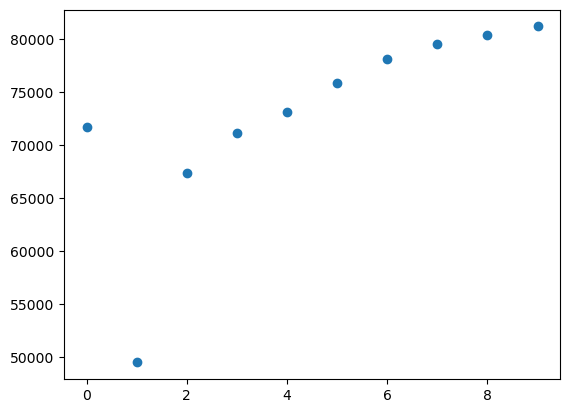

In [149]:
plt.scatter(Odo_Year_median.keys(), Odo_Year_median)

In [186]:
def process_vehicle_data(df):
    Year_list = []
    Low_list = []
    Medium_list = []
    High_list = []
    Count_list = []  # Lista za broj automobila po godini

    for age in sorted(df['VehicleAge'].unique()):
        if age == 0:
            continue 

        train_Age = df[df['VehicleAge'] == age].copy()
        
        Q1 = train_Age['VehOdo'].quantile(0.25)
        Q3 = train_Age['VehOdo'].quantile(0.75)
        IQR = Q3 - Q1
        
        train_Age['Cat'] = 'Medium'
        train_Age.loc[train_Age['VehOdo'] < (Q1 - IQR), 'Cat'] = 'Low'
        train_Age.loc[train_Age['VehOdo'] > (Q3 + 0.6*IQR), 'Cat'] = 'High'
        
        cross_odo = pd.crosstab(train_Age['Cat'], train_Age['IsBadBuy'], normalize='index')
        
        Year_list.append(age)
        Low_list.append(cross_odo.loc['Low', 1]) 
        Medium_list.append(cross_odo.loc['Medium', 1])
        High_list.append(cross_odo.loc['High', 1])
        Count_list.append(len(train_Age))  # Dodaj broj automobila u listu

    df_odo = pd.DataFrame({
        'Year': Year_list,
        'Low': Low_list,
        'Medium': Medium_list,
        'High': High_list,
        'Count': Count_list  # Dodaj broj automobila kao novu kolonu
    })

    return df_odo

df_odo = process_vehicle_data(df)


In [187]:
df_odo

,Year,Low,Medium,High,Count
0,1,0.133333,0.040070,0.029056,2180
1,2,0.121212,0.064986,0.046875,5929
2,3,0.110169,0.079415,0.079208,11121
3,4,0.088452,0.108032,0.108108,11931
4,5,0.113111,0.148563,0.193252,9102
5,6,0.157692,0.182802,0.252336,5649
6,7,0.096154,0.222185,0.310811,3187
7,8,0.177778,0.271378,0.324324,1542
8,9,0.250000,0.335038,0.230769,445


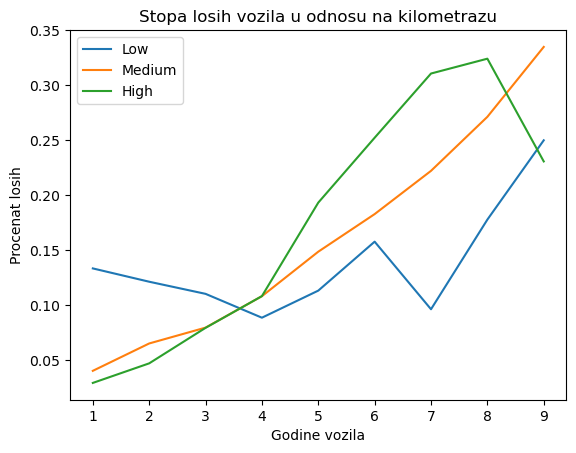

In [189]:
fig,ax = plt.subplots()

for col in df_odo.columns[1:-1]:
    ax.plot(df_odo['Year'],df_odo[col], label=col)

ax.set_title('Stopa losih vozila u odnosu na kilometrazu')
ax.set_xlabel("Godine vozila")
ax.set_ylabel("Procenat losih")
plt.legend()

U ovom kodu koristimo interkvartilni opseg (IQR) da klasifikujemo vozila u tri kategorije (Low, Medium, High) na osnovu njihove kilometraže (VehOdo) - preciznije kategoriju kilometraže za svaku godinu koju vozilo može imati.  Vrednosti ispod Q1 - IQR se smatraju niskim (Low), dok se vrednosti iznad Q3 + 0.6 * IQR smatraju visokim (High). Ovaj pristup omogućava identifikaciju vozila sa neobično malom ili velikom kilometražom, što može biti korisno za prepoznavanje potencijalnih autlajera ili anomalija u podacima. Ovi podaci govore koliki je intenzitet koriscenja, i pokazalo se da postoji znacajna veza sa izlaznom promenljivom.

### Poreklo proizvodjaca - Nationality

In [71]:
df['Nationality'].value_counts()

Nationality
AMERICAN          42721
OTHER ASIAN        5640
TOP LINE ASIAN     2577
OTHER               146
Name: count, dtype: int64

In [72]:

pd.crosstab(df.Make, df.Nationality)

Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN
Make,,,,
ACURA,0,0,21,0
BUICK,495,0,0,0
CADILLAC,23,0,0,0
CHEVROLET,12083,0,0,0
CHRYSLER,6126,0,0,0
DODGE,9002,0,0,0
FORD,7986,0,0,0
GMC,475,0,0,0
HONDA,0,0,0,344


 Toyota Scion treba da bude samo Scion, sa ostalih 129

Text(0, 0.5, 'Broj vozila')

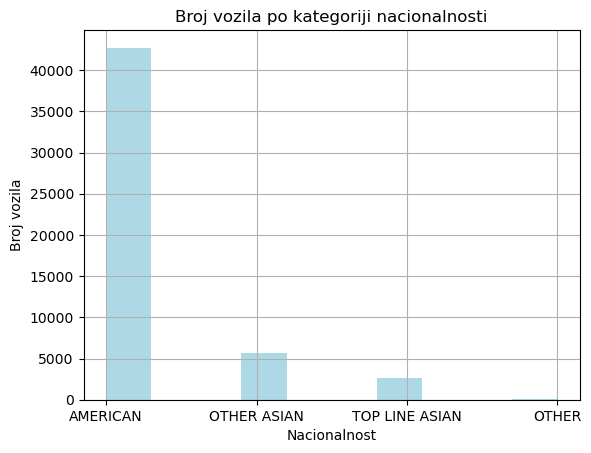

In [73]:
nation = df['Nationality'].hist(color='lightblue')
plt.title('Broj vozila po kategoriji nacionalnosti')
plt.xlabel('Nacionalnost')
plt.ylabel('Broj vozila')

In [74]:
cross_nation = pd.crosstab( df.Nationality, df.IsBadBuy)
cross_nation_p = cross_nation.div(cross_nation.sum(1).astype(float), axis=0)

combined = pd.concat([cross_nation, cross_nation_p], axis=1, keys=['Count', 'Percentage'])
combined_sorted = combined.sort_values(by=('Percentage', 1), ascending=False)
combined_sorted

Count       Percentage          
IsBadBuy            0     1          0         1
Nationality                                     
OTHER             125    21   0.856164  0.143836
OTHER ASIAN      4876   764   0.864539  0.135461
TOP LINE ASIAN   2232   345   0.866123  0.133877
AMERICAN        37558  5163   0.879146  0.120854

### Najveci americki proizvodjaci - Top 3 american name

In [75]:
df['TopThreeAmericanName'].value_counts()

TopThreeAmericanName
GM          17802
CHRYSLER    16234
FORD         8685
OTHER        8363
Name: count, dtype: int64

In [76]:
df.loc[df['TopThreeAmericanName']=="GM",'Make'].head(30)

0      CHEVROLET
5      CHEVROLET
10     CHEVROLET
13         BUICK
14        SATURN
25     CHEVROLET
26     CHEVROLET
36     CHEVROLET
37     CHEVROLET
39       PONTIAC
45     CHEVROLET
46     CHEVROLET
47           GMC
50     CHEVROLET
53     CHEVROLET
56           GMC
58       PONTIAC
63           GMC
64     CHEVROLET
69       PONTIAC
71     CHEVROLET
75     CHEVROLET
81     CHEVROLET
85     CHEVROLET
93        SATURN
94     CHEVROLET
96       PONTIAC
100    CHEVROLET
103    CHEVROLET
105      PONTIAC
Name: Make, dtype: object

Ovaj atribut predstavlja dopunu za atribut Make. Najcesca vrednost je GM - general Motors, grupacija koja obuhvata Chevrolet, Pontiac, Saturn i druge

In [10]:
def analyze_bad_buy(df, first_column):
    # Kreiranje crosstab
    cross_nation = pd.crosstab(df[first_column], df['IsBadBuy'])
    
    # Računanje procenta
    cross_nation_p = cross_nation.div(cross_nation.sum(1).astype(float), axis=0)
    
    # Kombinovanje brojanja i procenta
    combined = pd.concat([cross_nation, cross_nation_p], axis=1, keys=['Count', 'Percentage'])
    
    # Sortiranje po procentu IsBadBuy = 1
    combined_sorted = combined.sort_values(by=('Percentage', 1), ascending=False)
    
    return combined_sorted

In [78]:
result = analyze_bad_buy(df, 'TopThreeAmericanName')
print(result)

                      Count       Percentage          
IsBadBuy                  0     1          0         1
TopThreeAmericanName                                  
FORD                   7337  1348   0.844790  0.155210
OTHER                  7233  1130   0.864881  0.135119
CHRYSLER              14356  1878   0.884317  0.115683
GM                    15865  1937   0.891192  0.108808


Vidimo da je Ford dosta los

### Size - Veličina vozila

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35'),
  Text(40.0, 0, '40'),
  Text(45.0, 0, '45')])

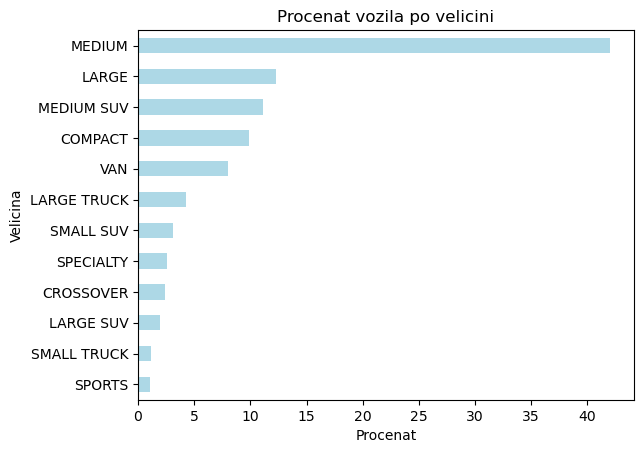

In [79]:
size = df['Size'].value_counts(normalize=True)*100
size.sort_values(ascending=True).plot(kind='barh', title='Procenat vozila po velicini', color='lightblue')
plt.xlabel('Procenat')
plt.ylabel('Velicina')
plt.xticks(rotation=0)

In [80]:
analyze_bad_buy(df,'Size')

Count       Percentage          
IsBadBuy         0     1          0         1
Size                                         
SPORTS         452   103   0.814414  0.185586
LARGE SUV      843   162   0.838806  0.161194
COMPACT       4235   811   0.839279  0.160721
MEDIUM SUV    4833   855   0.849684  0.150316
SMALL SUV     1351   218   0.861058  0.138942
SMALL TRUCK    514    79   0.866779  0.133221
VAN           3581   512   0.874908  0.125092
MEDIUM       19000  2482   0.884461  0.115539
LARGE TRUCK   1947   246   0.887825  0.112175
CROSSOVER     1108   125   0.898621  0.101379
LARGE         5709   579   0.907920  0.092080
SPECIALTY     1218   121   0.909634  0.090366

In [81]:
pd.crosstab(df.Model,df.Size).head(5)

Size,COMPACT,CROSSOVER,LARGE,LARGE SUV,LARGE TRUCK,MEDIUM,MEDIUM SUV,SMALL SUV,SMALL TRUCK,SPECIALTY,SPORTS,VAN
Model,,,,,,,,,,,,
1500 RAM PICKUP 2WD,0,0,0,0,749,0,0,0,0,0,0,0
1500 RAM PICKUP 4WD,0,0,0,0,36,0,0,0,0,0,0,0
1500 SIERRA PICKUP 2,0,0,0,0,89,0,0,0,0,0,0,0
1500 SIERRA PICKUP 4,0,0,0,0,4,0,0,0,0,0,0,0
1500 SILVERADO PICKU,0,0,0,0,404,0,0,0,0,0,0,0


Ubedljivo najcesca kategorija su Medium - srednje velicine, preko 40 posto u skupu podataka. Druga najcesca kategorija su 'Large' vozila, koja imaju manji rizik da budu bad cars od proseka (9,2%). Sportska vozila imaju duplo vecu sansu da imaju pozitivnu vrednost za bad buy (18,5%) a verujuemo da je to zbog nacina korsicenja vozila za sport vise se opterecuju, a zatim slede large SUV i compact sa oko 16%. 

### MMR indeksi 


Manheim Market Report (MMR) je vodeći pokazatelj veleprodajnih cena. Kao „živi algoritam“, cene u MMR-u se računaju na osnovu miliona prodajnih transakcija iz prethodnih 13 meseci, pružajući precizne cene koje su nenadmašne u poređenju sa vodičima cena.

MMRAcquisitionAuctionAveragePrice: cena vozila na aukciji u prosečnom stanju u trenutku kupovine;

MMRAcquisitionAuctionCleanPrice: cena vozila na aukciji u iznadprosečnom stanju u trenutku kupovine;

MMRAcquisitionRetailAveragePrice: cena vozila kod dilera u prosečnom stanju u trenutku kupovine;

MMRAcquisitonRetailCleanPrice: cena vozila kod dilera u iznadprosečnom stanju u trenutku kupovine;

MMRCurrentAuctionAveragePrice: cena vozila na aukciji u prosečnom stanju u trenutku kreiranja skupa podataka;

MMRCurrentAuctionCleanPrice: cena vozila na aukciji u iznadprosečnom stanju u trenutku kreiranja skupa podataka;

MMRCurrentRetailAveragePrice: cena vozila kod dilera u prosečnom stanju u trenutku kreiranja skupa podataka;

MMRCurrentRetailCleanPrice: cena vozila kod dilera u iznadprosečnom stanju u trenutku kreiranja skupa podataka.

Current cene predstavljaju cene vozila u trenutku kreiranja skupa podataka. Hipoteticki, ako bismo napravili model koji bi se koristio u industriji, ovi podaci ne bi bili relevantni zato sto bi vremenom postali zastareli jer se current vezuje za jedan trenutak u vremenu - vreme stvaranja data seta. Zbog toga, necemo ih koristiti za predvidjanje u klasifikaciji.

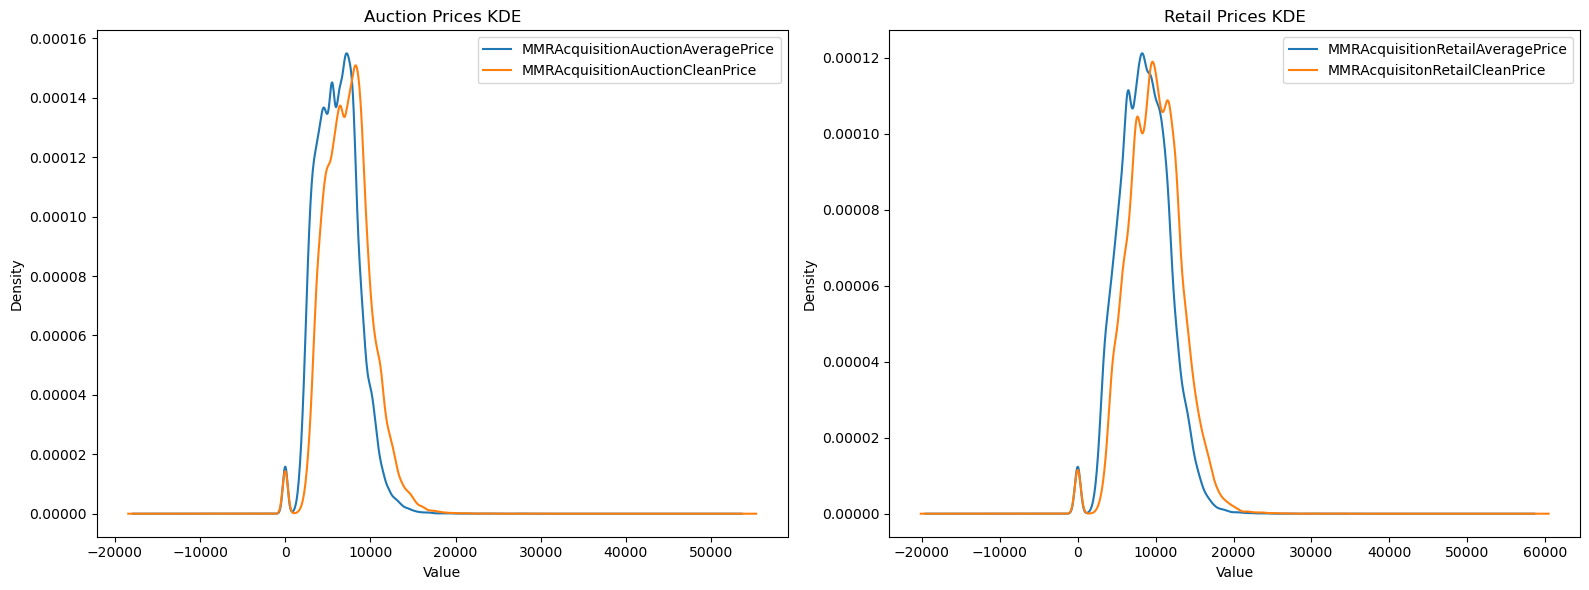

In [82]:
import matplotlib.pyplot as plt

# Kolone za aukciju i maloprodaju
columns_auction = ['MMRAcquisitionAuctionAveragePrice', 
                    'MMRAcquisitionAuctionCleanPrice']
columns_retail = ['MMRAcquisitionRetailAveragePrice', 
                   'MMRAcquisitonRetailCleanPrice']

# Plotovanje KDE za aukciju
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)  # Prvi subplot
for column in columns_auction:
    df[column].plot(kind='kde', label=column)
plt.title('Auction Prices KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# Plotovanje KDE za maloprodaju
plt.subplot(1, 2, 2)  # Drugi subplot
for column in columns_retail:
    df[column].plot(kind='kde', label=column)
plt.title('Retail Prices KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [83]:
df['MMRAcquisitionAuctionCleanPrice'].describe()

count    51077.000000
mean      7378.193414
std       2715.735315
min          0.000000
25%       5419.000000
50%       7311.000000
75%       9025.000000
max      36859.000000
Name: MMRAcquisitionAuctionCleanPrice, dtype: float64

In [84]:
df['MMRAcquisitonRetailCleanPrice'].describe()

count    51077.000000
mean      9862.879222
std       3379.291047
min          0.000000
25%       7502.000000
50%       9809.000000
75%      12097.000000
max      40308.000000
Name: MMRAcquisitonRetailCleanPrice, dtype: float64

In [85]:
diff_mean_clean = df['MMRAcquisitonRetailCleanPrice'].mean()-df['MMRAcquisitionAuctionCleanPrice'].mean()
diff_mean_average=df['MMRAcquisitionRetailAveragePrice'].mean()-df['MMRAcquisitionAuctionAveragePrice'].mean()
print('Prosecna marza za vozila u dobrom stanju: ',diff_mean_clean)
print('Prosecna marza za vozila u prosecnom stanju: ',diff_mean_average)

Prosecna marza za vozila u dobrom stanju:  2484.685807702096
Prosecna marza za vozila u prosecnom stanju:  2374.748869354112


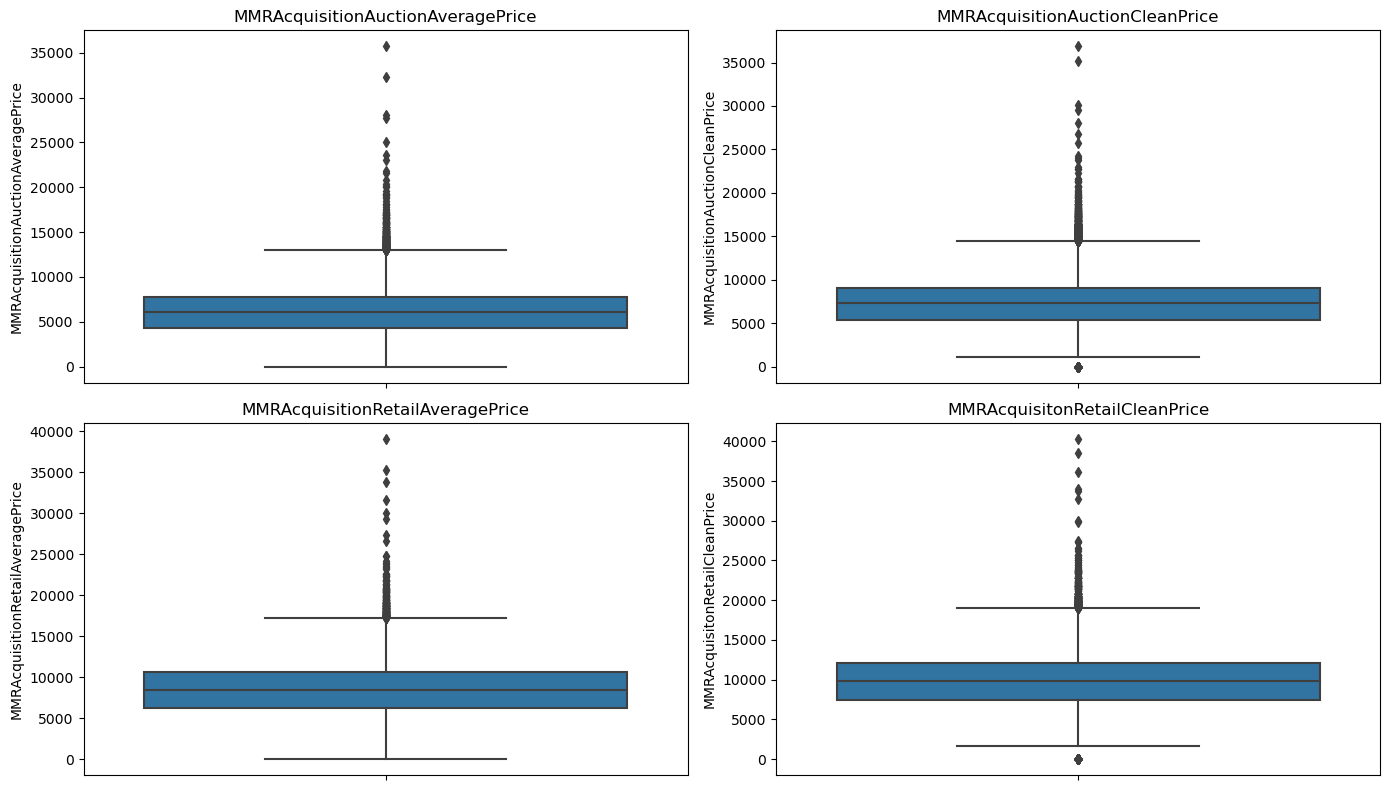

In [86]:
mmr_columns = [
    'MMRAcquisitionAuctionAveragePrice',
    'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice',
    'MMRAcquisitonRetailCleanPrice'
]


plt.figure(figsize=(14, 8))


for i, column in enumerate(mmr_columns, 1):
    plt.subplot(2, 2, i)  # 2x2 grid
    sns.boxplot(y=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [87]:
 df.loc[
    (df[mmr_columns] == 1).any(axis=1)
].shape

(90, 36)

In [88]:
def plot_bin_percentage(df, column_name, bin_size, target_column):
    # Izračunavanje maksimalne cene i generisanje granica binova
    max_price = df[column_name].max()
    min_price = df[column_name].min()
    bins = np.arange(min_price-bin_size, max_price + bin_size, bin_size)

    # Kreiranje nove kolone za binovanje
    df['MmrBin'] = pd.cut(df[column_name], bins=bins, include_lowest=True)

    # Kreiranje kontingentne tabele
    cross_mmr = pd.crosstab(df['MmrBin'], df[target_column])
    
    # Dodavanje broja instanci u kontingentnu tabelu
    cross_mmr['Total Instances'] = cross_mmr.sum(axis=1)
    
    print("Kontingentna tabela sa brojem instanci:")
    print(cross_mmr)

    # Izračunavanje procenta
    cross_mmr_p = cross_mmr.div(cross_mmr['Total Instances'].astype(float), axis=0)
    cross_mmr_p = cross_mmr_p.drop(columns='Total Instances')  # Ukloniti kolonu 'Total Instances' pre plotovanja

    print("Procenat po binu:")
    print(cross_mmr_p)

    # Plotovanje
    plt.figure(figsize=(14, 8))
    ax = cross_mmr_p.plot(kind='bar', stacked=True, color=['lightblue', 'pink'], title='Procenat IsBadBuy po mmr ceni vozila', ax=plt.gca())
    plt.xlabel('Cena vozila')
    plt.ylabel('Procenat')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='IsBadBuy', labels=['Nije loša kupovina', 'Loša kupovina'])
    plt.show()

Kontingentna tabela sa brojem instanci:
IsBadBuy               0     1  Total Instances
QuantileBin                                    
(-0.001, 6995.0]    8326  1902            10228
(6995.0, 8975.0]    8871  1339            10210
(8975.0, 10702.0]   9100  1118            10218
(10702.0, 12600.0]  9228   979            10207
(12600.0, 40308.0]  9259   955            10214
Procenat po binu:
IsBadBuy                   0         1
QuantileBin                           
(-0.001, 6995.0]    0.814040  0.185960
(6995.0, 8975.0]    0.868854  0.131146
(8975.0, 10702.0]   0.890585  0.109415
(10702.0, 12600.0]  0.904085  0.095915
(12600.0, 40308.0]  0.906501  0.093499


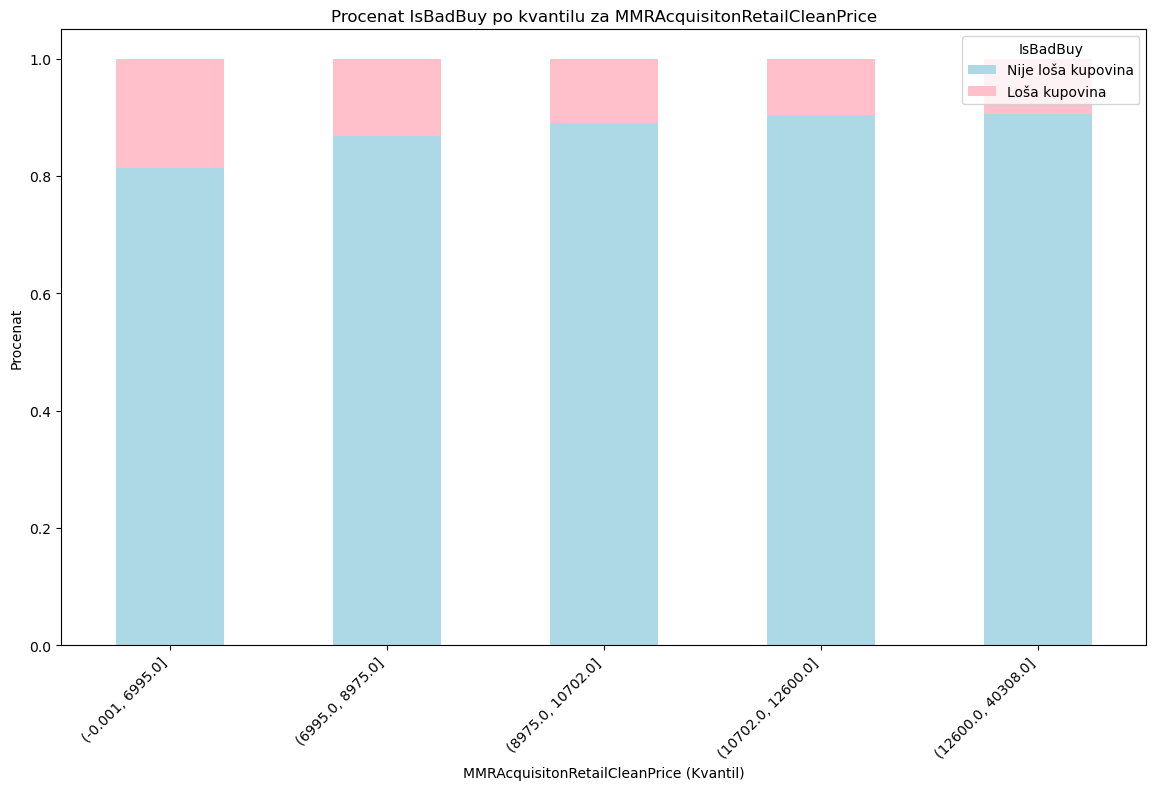

In [137]:
plot_quantile_bin_percentage(df,'MMRAcquisitonRetailCleanPrice',5,'IsBadBuy')

Kontingentna tabela sa brojem instanci:
IsBadBuy              0     1  Total Instances
QuantileBin                                   
(-0.001, 3907.0]   8149  2072            10221
(3907.0, 5411.0]   8757  1456            10213
(5411.0, 6805.0]   9148  1067            10215
(6805.0, 8078.0]   9409   810            10219
(8078.0, 35722.0]  9321   888            10209
Procenat po binu:
IsBadBuy                  0         1
QuantileBin                          
(-0.001, 3907.0]   0.797280  0.202720
(3907.0, 5411.0]   0.857437  0.142563
(5411.0, 6805.0]   0.895546  0.104454
(6805.0, 8078.0]   0.920736  0.079264
(8078.0, 35722.0]  0.913018  0.086982


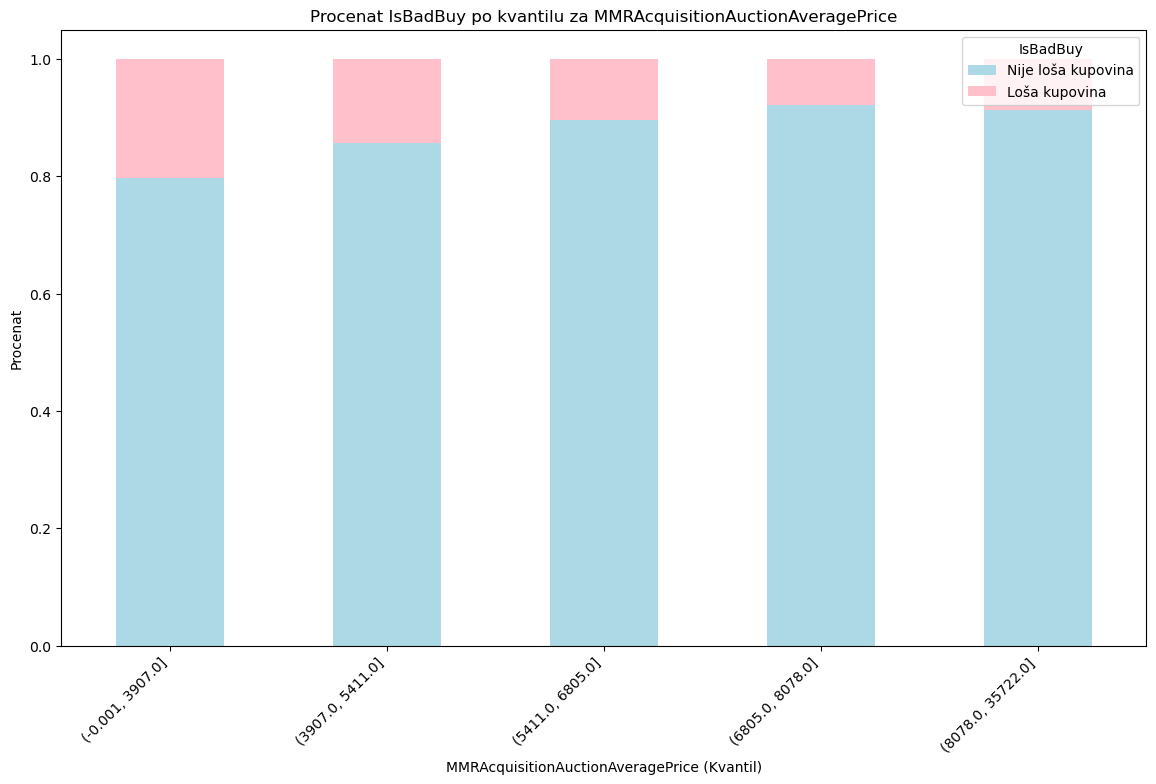

In [141]:
plot_quantile_bin_percentage(df,'MMRAcquisitionAuctionAveragePrice',5,'IsBadBuy')

Kontingentna tabela sa brojem instanci:
IsBadBuy              0     1  Total Instances
QuantileBin                                   
(-0.001, 4987.2]   8146  2070            10216
(4987.2, 6555.0]   8825  1392            10217
(6555.0, 8014.0]   9140  1078            10218
(8014.0, 9444.0]   9384   828            10212
(9444.0, 36859.0]  9289   925            10214
Procenat po binu:
IsBadBuy                  0         1
QuantileBin                          
(-0.001, 4987.2]   0.797377  0.202623
(4987.2, 6555.0]   0.863756  0.136244
(6555.0, 8014.0]   0.894500  0.105500
(8014.0, 9444.0]   0.918919  0.081081
(9444.0, 36859.0]  0.909438  0.090562


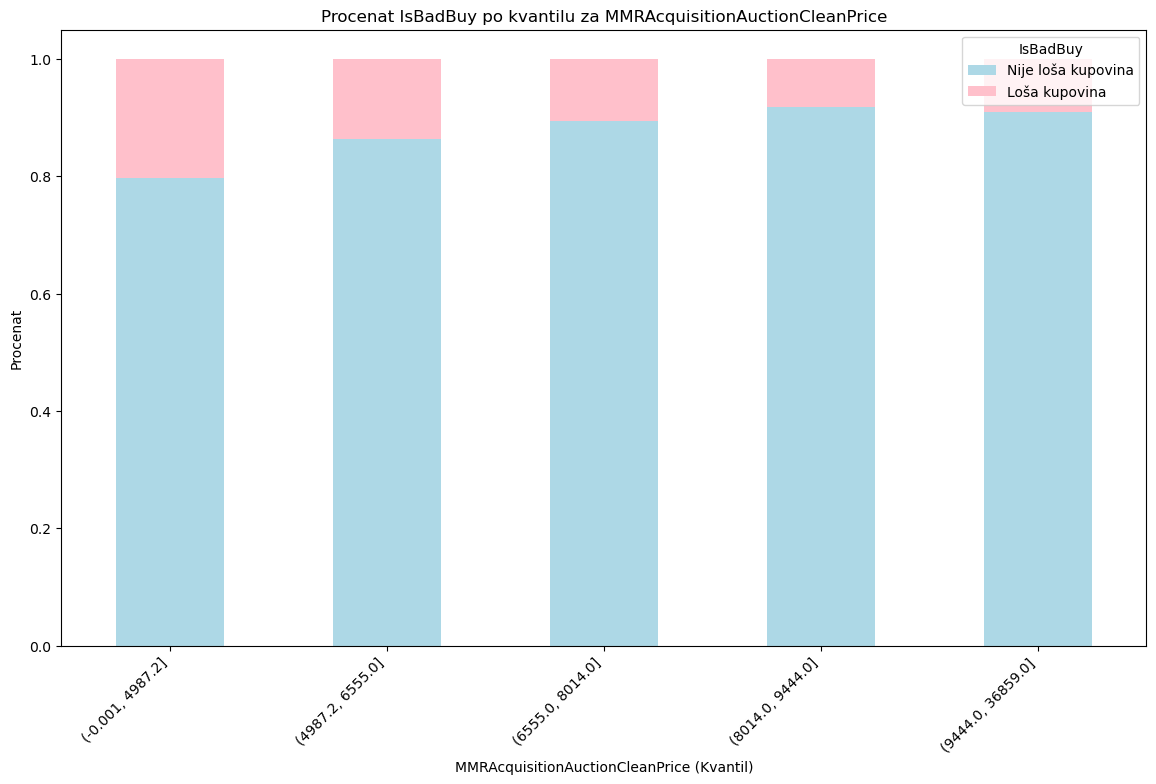

In [142]:
plot_quantile_bin_percentage(df,'MMRAcquisitionAuctionCleanPrice',5,'IsBadBuy')

Kontingentna tabela sa brojem instanci:
IsBadBuy               0     1  Total Instances
QuantileBin                                    
(-0.001, 5765.0]    8382  1845            10227
(5765.0, 7630.0]    8785  1422            10207
(7630.0, 9335.0]    9094  1119            10213
(9335.0, 11156.0]   9208  1011            10219
(11156.0, 39080.0]  9315   896            10211
Procenat po binu:
IsBadBuy                   0         1
QuantileBin                           
(-0.001, 5765.0]    0.819595  0.180405
(5765.0, 7630.0]    0.860684  0.139316
(7630.0, 9335.0]    0.890434  0.109566
(9335.0, 11156.0]   0.901067  0.098933
(11156.0, 39080.0]  0.912251  0.087749


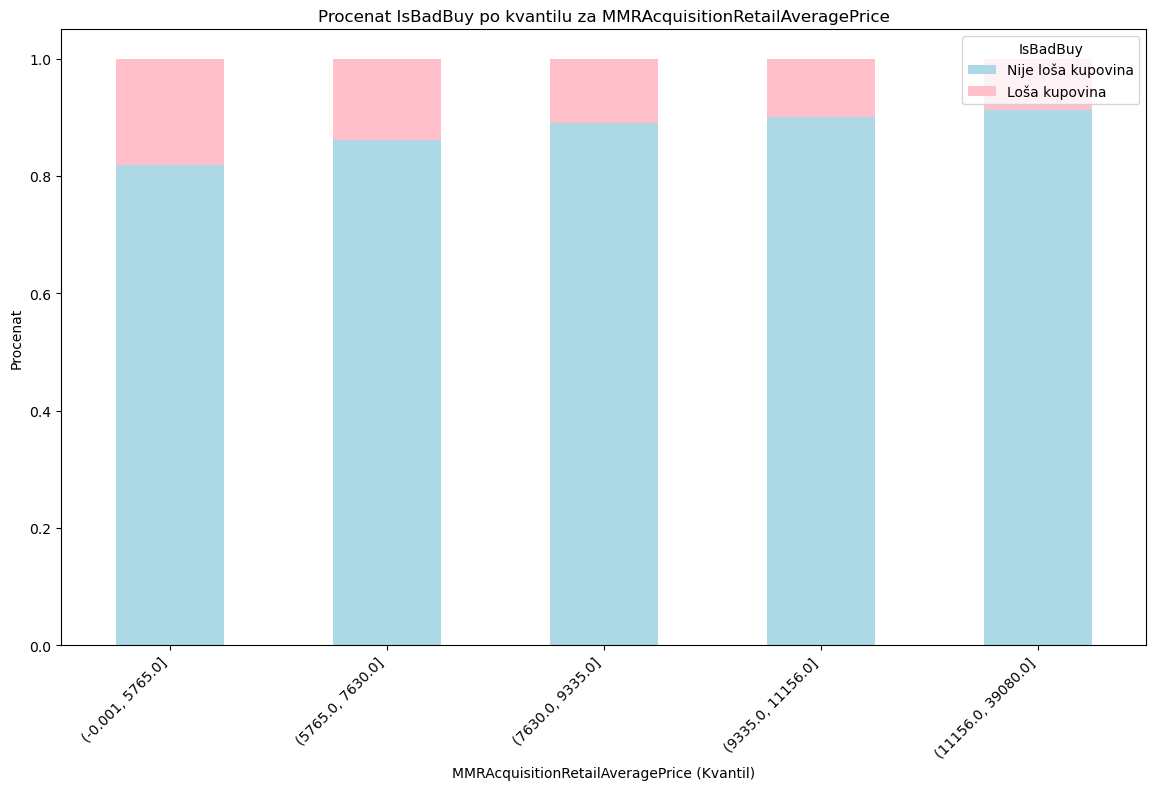

In [143]:
plot_quantile_bin_percentage(df,'MMRAcquisitionRetailAveragePrice',5,'IsBadBuy')

### PRIMEUNIT 
Ako je vrednost pozitivna, vozilo se smatra primarnom jedinicom u svojoj kategoriji. To može značiti da je vozilo spremno za prodaju ili upotrebu bez dodatnih popravki ili da ispunjava određene standarde kvaliteta.

In [93]:
unique_percentage(df['PRIMEUNIT'])

0.0039148136548700285

In [94]:
df['PRIMEUNIT'].isnull().sum()/len(df)*100

95.31984027560289

(array([0, 1]), [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

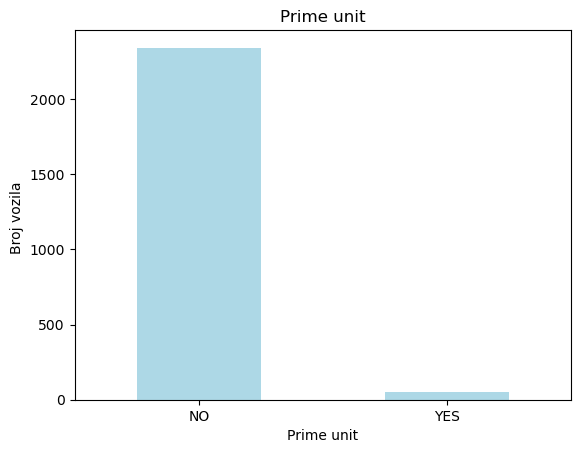

In [95]:
count_auction = df["PRIMEUNIT"].value_counts().plot(kind="bar", title="Prime unit",color='lightblue')
plt.xlabel('Prime unit')
plt.ylabel('Broj vozila ')
plt.xticks(rotation=0)

In [96]:
analyze_bad_buy(df,'PRIMEUNIT')

Count     Percentage          
IsBadBuy      0   1          0         1
PRIMEUNIT                               
YES          46   5   0.901961  0.098039
NO         2249  91   0.961111  0.038889

Cak 95% podataka je null, a ako bismo ih tumacili kao 0, dobili bismo izrazito neizbalansirane podatke, sto onemogucava smislenu analizu. Necemo koristiti ovaj atribut

 ### AUCGUART - aukcijska garancija

In [97]:
df['PRIMEUNIT'].isnull().sum()/len(df)*100

95.31984027560289

(array([0, 1]), [Text(0, 0, 'GREEN'), Text(1, 0, 'RED')])

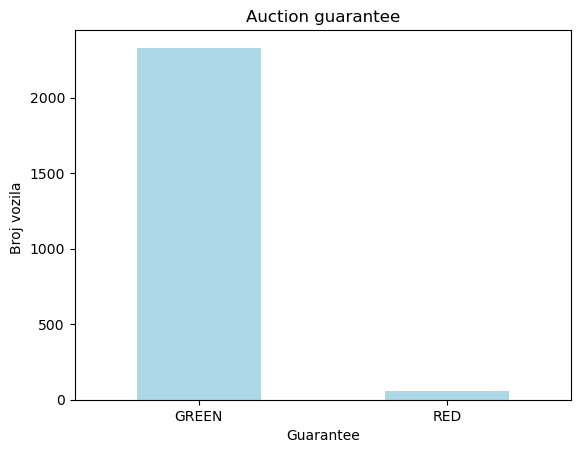

In [98]:
count_auction = df["AUCGUART"].value_counts().plot(kind="bar", title="Auction guarantee",color='lightblue')
plt.xlabel('Guarantee')
plt.ylabel('Broj vozila ')
plt.xticks(rotation=0)

In [99]:
analyze_bad_buy(df,'AUCGUART')

Count     Percentage          
IsBadBuy     0   1          0         1
AUCGUART                               
RED         54   7   0.885246  0.114754
GREEN     2241  89   0.961803  0.038197

In [100]:
from scipy import stats

cross_guart = pd.crosstab(df['AUCGUART'], df['IsBadBuy'])
chi2_guart, p_guart, dof_guart, expected_guart = stats.chi2_contingency(cross_guart)
print(f"Vrednost statistike: {chi2_guart}, p-vrednost: {p_guart}, Stepeni slobode: {dof_guart}")
alpha = 0.05
if p_guart < alpha:
    print("Postoji znacajna statisticka zavisnost izmedju vrednosti za atribute AUCGUART i IsBadBuy.")
else:
    print("Nema statisticki znacajne zavisnosti izmedju vrednosti za atribute AUCGUART i IsBadBuy.")

Vrednost statistike: 7.162819183806112, p-vrednost: 0.007443012452875619, Stepeni slobode: 1
Postoji znacajna statisticka zavisnost izmedju vrednosti za atribute AUCGUART i IsBadBuy.


Ovom atributu nedostaje ogroman broj podataka (95%), ali je Hi Kvadrat test pokazao da postoji znacajna korelacija izmedju atributa sa izlaznom promenljivom. Pitanje je, da li je uzorak dovoljno veliki, i ako jeste, sta raditi sa null vrednostima.

### BYRNO - buyer number - broj prodavca

In [101]:
unique_percentage(df['BYRNO'])

0.140933291575321

In [102]:
len(df['BYRNO'].unique())

72

In [103]:
analyze_bad_buy(df,"BYRNO").head(20)

Count      Percentage          
IsBadBuy     0    1          0         1
BYRNO                                   
99760        0    2   0.000000  1.000000
99741        0    1   0.000000  1.000000
1152         3    2   0.600000  0.400000
18091        6    2   0.750000  0.250000
1045        35   11   0.760870  0.239130
10310       27    8   0.771429  0.228571
53245       50   13   0.793651  0.206349
1041         4    1   0.800000  0.200000
16926      753  163   0.822052  0.177948
23359     1191  253   0.824792  0.175208
20833     1149  240   0.827214  0.172786
52646      210   42   0.833333  0.166667
21047       86   17   0.834951  0.165049
1231       241   43   0.848592  0.151408
18880     2119  376   0.849299  0.150701
11410       17    3   0.850000  0.150000
52492      403   71   0.850211  0.149789
20740     1442  254   0.850236  0.149764
16044      985  173   0.850604  0.149396
1191        59   10   0.855072  0.144928

BYRNO ima veliki broj jedinstvenih vrednosti koje se ne mogu tumaciti, a pre svega smatramo da nema smisla predvidjati stanje automobila na osnovu toga ko ga je kupio, te ovaj atribut necemo koristiti za predvidjanje.

### VNST i VNZIP1 - savezna drzava u kojoj se vozilo nalazi

VNST je naziv drzave, a zipcode je identifikacioni broj te drzave, tako da cemo koristiti i analizirati samo jedan atribut.
Mozemo videti da Carvana pretezno posluje na jugu Sjedinjenih Americkih Drzava, a ukupno ima 37 drzava od 50.


In [104]:
df['VNST'].value_counts()

VNST
TX    9493
FL    7280
NC    4963
CA    4943
AZ    4299
CO    3497
SC    2956
OK    2466
GA    1748
TN    1278
VA    1145
MD     810
UT     618
PA     606
OH     575
MO     529
AL     476
NV     417
MS     362
IN     355
IA     352
IL     321
LA     244
NJ     230
WV     187
NM     172
KY     168
OR     150
ID     144
WA     101
NH      65
AR      56
MN      41
NE      18
MA      11
MI       8
NY       4
Name: count, dtype: int64

In [105]:
analyze_bad_buy(df,'VNST')

Count       Percentage          
IsBadBuy     0     1          0         1
VNST                                     
AR          44    12   0.785714  0.214286
MA           9     2   0.818182  0.181818
PA         507    99   0.836634  0.163366
NV         349    68   0.836930  0.163070
IL         269    52   0.838006  0.161994
VA         970   175   0.847162  0.152838
LA         207    37   0.848361  0.151639
IN         302    53   0.850704  0.149296
IA         301    51   0.855114  0.144886
MD         694   116   0.856790  0.143210
SC        2542   414   0.859946  0.140054
TX        8193  1300   0.863057  0.136943
CA        4277   666   0.865264  0.134736
NJ         201    29   0.873913  0.126087
TN        1118   160   0.874804  0.125196
MI           7     1   0.875000  0.125000
CO        3060   437   0.875036  0.124964
NM         151    21   0.877907  0.122093
AL         420    56   0.882353  0.117647
NC        4382   581   0.882934  0.117066
AZ        3820   479   0.888579  0.111421
FL        6471   809   0.888874  0.111126
GA        1559   189   0.891876  0.108124
NH          58     7   0.892308  0.107692
UT         553    65   0.894822  0.105178
MO         474    55   0.896030  0.103970
ID         130    14   0.902778  0.097222
OK        2247   219   0.911192  0.088808
MS         330    32   0.911602  0.088398
WV         171    16   0.914439  0.085561
OH         528    47   0.918261  0.081739
OR         139    11   0.926667  0.073333
KY         157    11   0.934524  0.065476
WA          95     6   0.940594  0.059406
NE          17     1   0.944444  0.055556
MN          39     2   0.951220  0.048780
NY           4     0   1.000000  0.000000

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '0.0'),
  Text(2.5, 0, '2.5'),
  Text(5.0, 0, '5.0'),
  Text(7.5, 0, '7.5'),
  Text(10.0, 0, '10.0'),
  Text(12.5, 0, '12.5'),
  Text(15.0, 0, '15.0'),
  Text(17.5, 0, '17.5'),
  Text(20.0, 0, '20.0')])

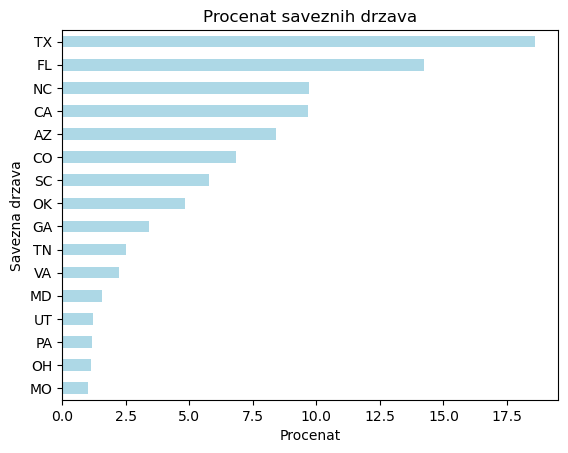

In [106]:
states = df['VNST'].value_counts(normalize=True)*100
states[states>1].sort_values(ascending=True).plot(kind='barh', title='Procenat saveznih drzava', color='lightblue')
plt.xlabel('Procenat')
plt.ylabel('Savezna drzava')
plt.xticks(rotation=0)

Vidimo da se preko 50% kupovina obavilo u svega 4 savezne drzave - Teksas, Florida, Kalifornija i Severna Karolina.
U njima je stopa losih vozila standardna - izmedju 11 i 13 posto.
Virdzinija i Pensilvanija pokazuju povecanu stopu losih vozila

### Online aukcija - IsOnlineSale

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

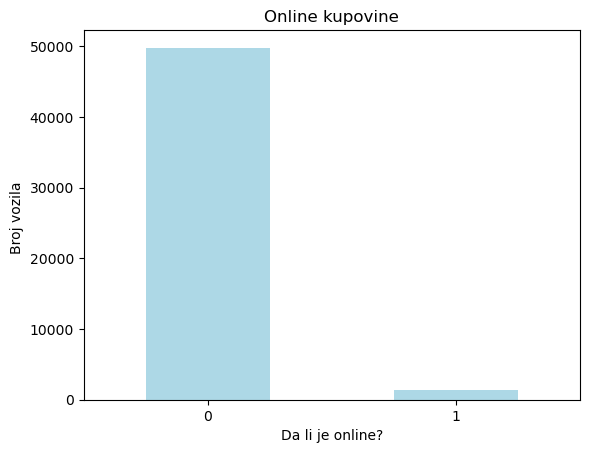

In [107]:
count_online = df["IsOnlineSale"].value_counts().plot(kind="bar", title="Online kupovine",color='lightblue')
plt.xlabel('Da li je online?')
plt.ylabel('Broj vozila ')
plt.xticks(rotation=0)

In [108]:
print('Procenat kupovina koje nisu online:',df.loc[df['IsOnlineSale']==0].shape[0] / len(df))

Procenat kupovina koje nisu online: 0.9743579705606014


In [109]:
analyze_bad_buy(df,'IsOnlineSale')

Count       Percentage          
IsBadBuy          0     1          0         1
IsOnlineSale                                  
0             43638  6140   0.876652  0.123348
1              1157   153   0.883206  0.116794

Imamo veoma neizbalansiran atribut kod kojeg ne postoji nikakva znacajna razlika u procentu losih automobila, te ovaj atribut necemo koristiti u daljem radu.

### VehBCost - osnovna cena vozila

In [110]:
df['VehBCost'].describe()

count    51088.000000
mean      6736.806328
std       1764.020233
min          1.000000
25%       5440.000000
50%       6725.000000
75%       7900.000000
max      38785.000000
Name: VehBCost, dtype: float64

<Axes: ylabel='Density'>

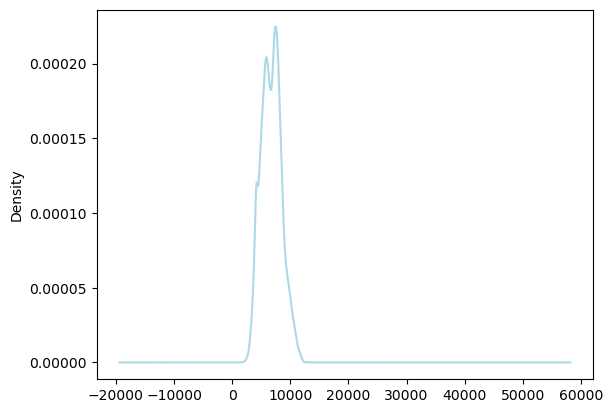

In [111]:
df['VehBCost'].plot(kind="kde", color = 'lightblue')

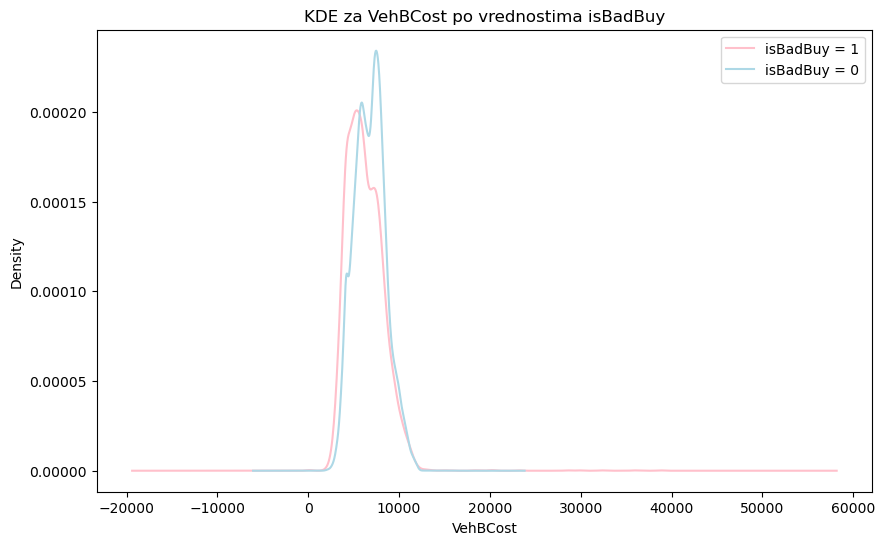

In [112]:
plt.figure(figsize=(10, 6))

df[df['IsBadBuy'] == 1]['VehBCost'].plot(kind='kde', color='pink', label='isBadBuy = 1')
df[df['IsBadBuy'] == 0]['VehBCost'].plot(kind='kde', color='lightblue', label='isBadBuy = 0')

plt.xlabel('VehBCost')
plt.ylabel('Density')
plt.title('KDE za VehBCost po vrednostima isBadBuy')
plt.legend()

plt.show()

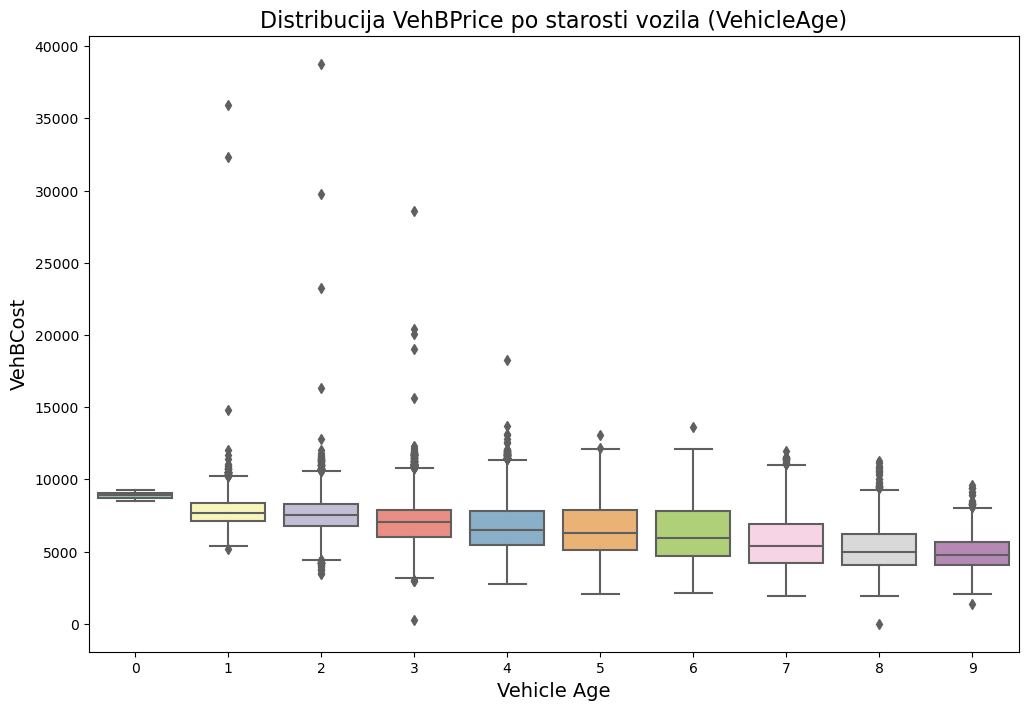

In [113]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='VehicleAge', y='VehBCost', data=df, palette="Set3")

# Dodavanje naslova i labela
plt.title('Distribucija VehBPrice po starosti vozila (VehicleAge)', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('VehBCost', fontsize=14)

# Prikazivanje grafikona
plt.show()

Kontingentna tabela sa brojem instanci:
IsBadBuy                0     1  Total Instances
MmrBin                                          
(-1999.001, 1.0]        0     1                1
(1.0, 2001.0]           2     2                4
(2001.0, 4001.0]     1799   644             2443
(4001.0, 6001.0]    13818  2507            16325
(6001.0, 8001.0]    18717  2016            20733
(8001.0, 10001.0]    8732   895             9627
(10001.0, 12001.0]   1710   207             1917
(12001.0, 14001.0]     16     9               25
(14001.0, 16001.0]      0     2                2
(16001.0, 18001.0]      1     0                1
(18001.0, 20001.0]      0     2                2
(20001.0, 22001.0]      0     2                2
(22001.0, 24001.0]      0     1                1
(28001.0, 30001.0]      0     2                2
(32001.0, 34001.0]      0     1                1
(34001.0, 36001.0]      0     1                1
(38001.0, 40001.0]      0     1                1
Procenat po binu:
IsBadBuy   

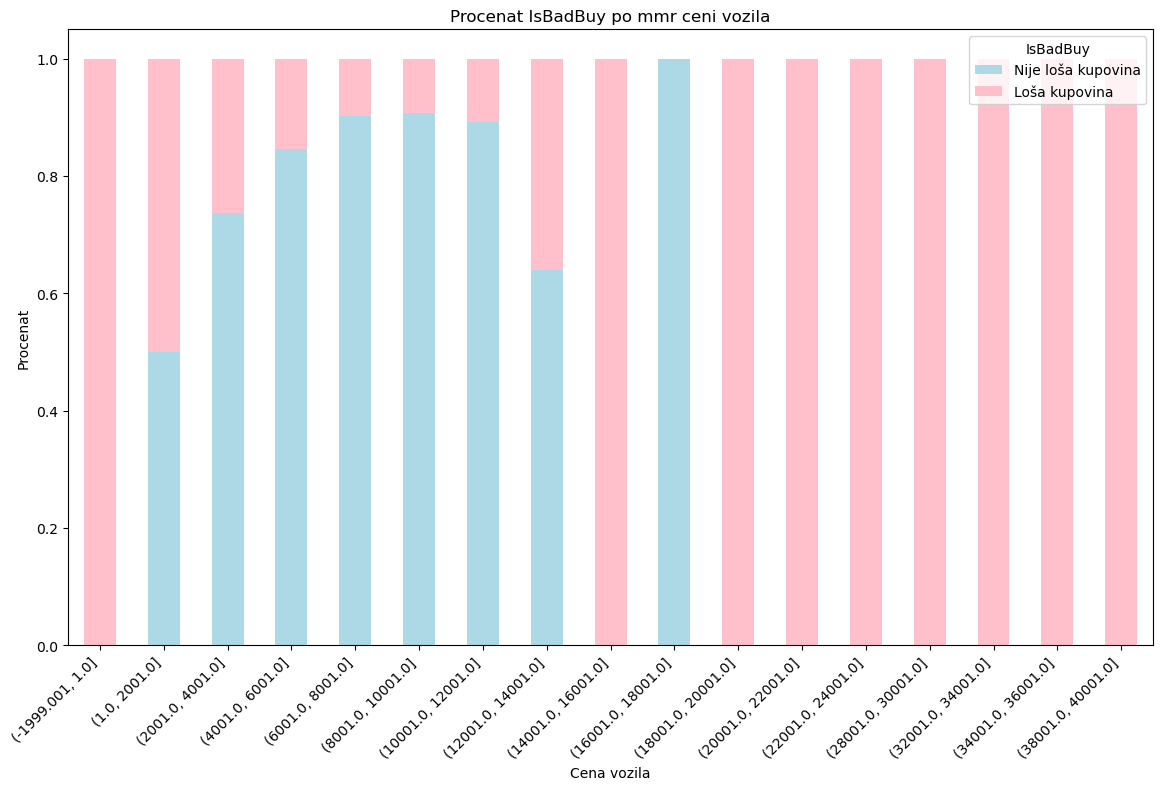

In [114]:
plot_bin_percentage(df, 'VehBCost', 2000.0, 'IsBadBuy')

### WarrantyCost - cena garancije koju placa Carvana

In [115]:
df['WarrantyCost'].describe()

count    51088.000000
mean      1277.668396
std        599.811520
min        462.000000
25%        837.000000
50%       1169.000000
75%       1623.000000
max       7498.000000
Name: WarrantyCost, dtype: float64

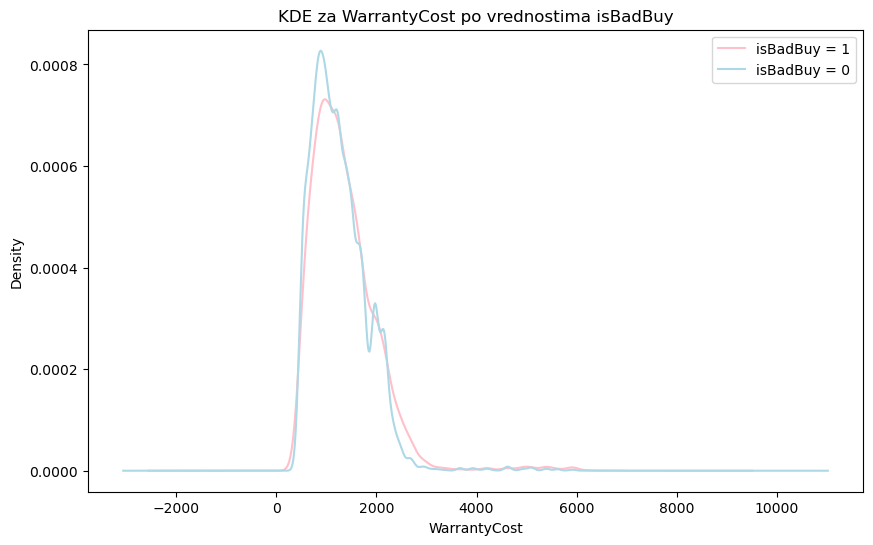

In [116]:
plt.figure(figsize=(10, 6))

df[df['IsBadBuy'] == 1]['WarrantyCost'].plot(kind='kde', color='pink', label='isBadBuy = 1')
df[df['IsBadBuy'] == 0]['WarrantyCost'].plot(kind='kde', color='lightblue', label='isBadBuy = 0')

plt.xlabel('WarrantyCost')
plt.ylabel('Density')
plt.title('KDE za WarrantyCost po vrednostima isBadBuy')
plt.legend()

plt.show()

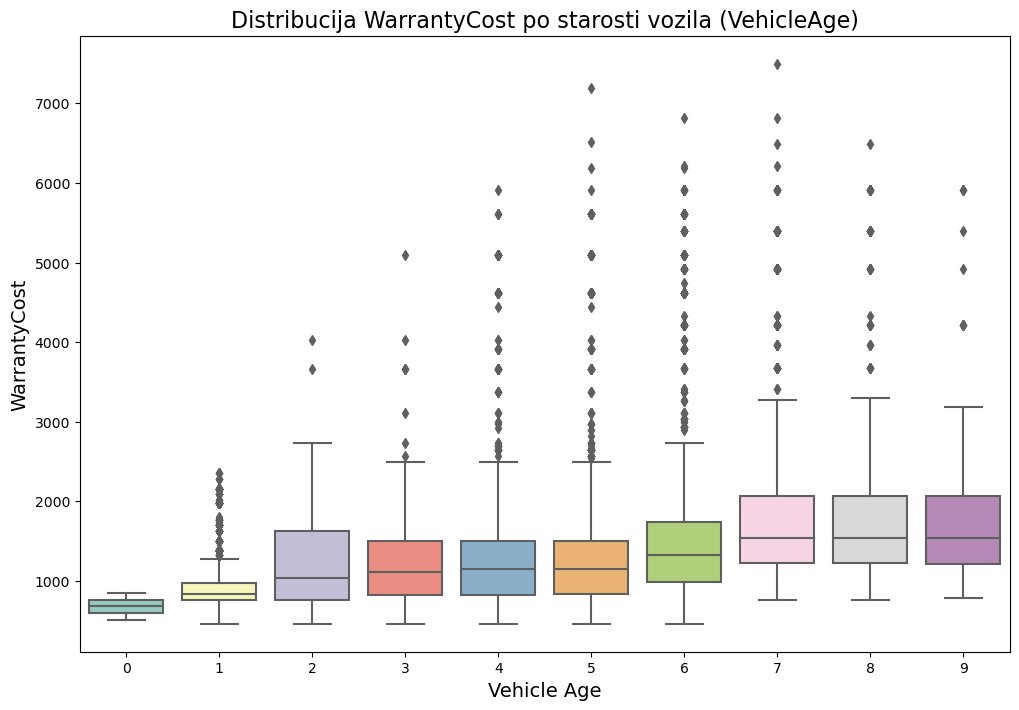

In [117]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='VehicleAge', y='WarrantyCost', data=df, palette="Set3")

# Dodavanje naslova i labela
plt.title('Distribucija WarrantyCost po starosti vozila (VehicleAge)', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('WarrantyCost', fontsize=14)

# Prikazivanje grafikona
plt.show()

Kontingentna tabela sa brojem instanci:
IsBadBuy             0    1  Total Instances
MmrBin                                      
(311.999, 462.0]   262   14              276
(462.0, 612.0]    3584  442             4026
(612.0, 762.0]    4672  547             5219
(762.0, 912.0]    4532  576             5108
(912.0, 1062.0]   6091  809             6900
(1062.0, 1212.0]  3736  504             4240
(1212.0, 1362.0]  4866  758             5624
(1362.0, 1512.0]  5264  656             5920
(1512.0, 1662.0]  2353  410             2763
(1662.0, 1812.0]  2784  406             3190
(1812.0, 1962.0]   777  186              963
(1962.0, 2112.0]  2398  307             2705
(2112.0, 2262.0]  1755  214             1969
(2262.0, 2412.0]   755  147              902
(2412.0, 2562.0]   296  100              396
(2562.0, 2712.0]   201   85              286
(2712.0, 2862.0]    24    9               33
(2862.0, 3012.0]    60   26               86
(3012.0, 3162.0]    22    5               27
(3162.0, 3312.0

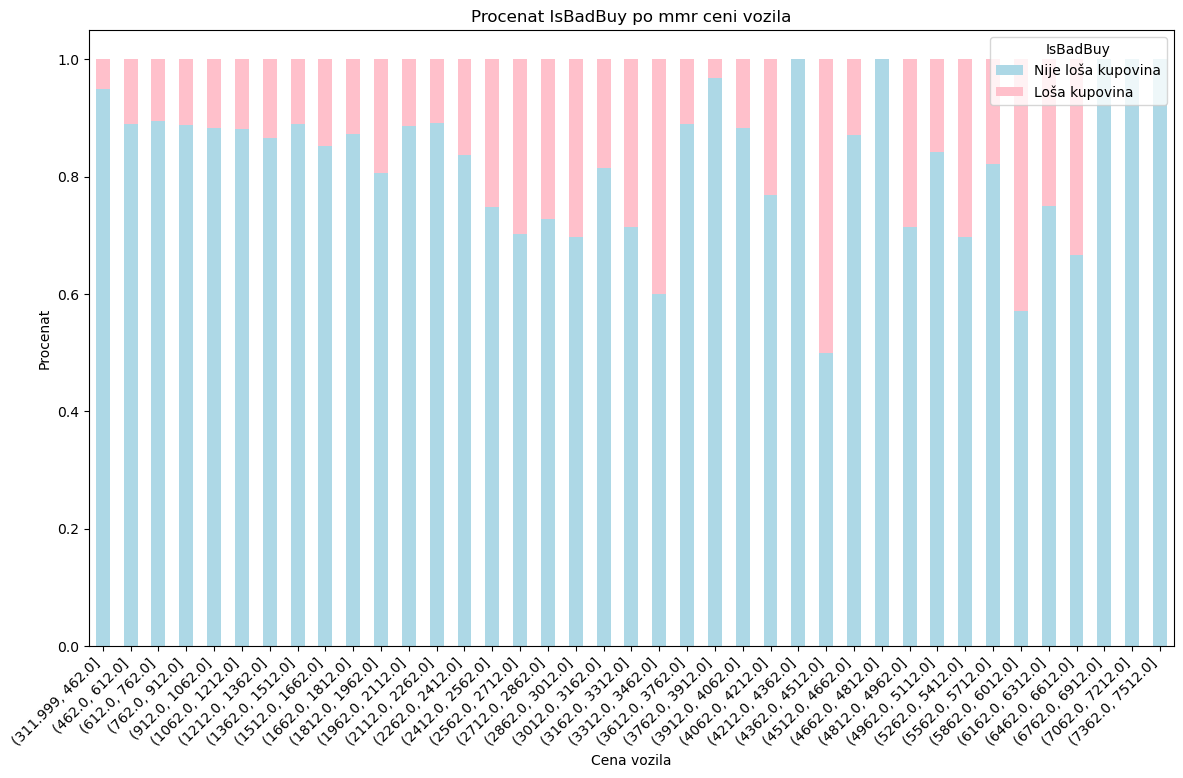

In [118]:
plot_bin_percentage(df, 'WarrantyCost', 150.0, 'IsBadBuy')

Starija vozila su sklonija kvarovima i zahtevaju više održavanja u poređenju sa novijim vozilima. Proizvođači garancija i osiguravači uzimaju u obzir ovaj povećani rizik kada određuju cenu garancije. Kako vozilo stari, verovatnoća da će doći do problema koji zahtevaju popravke raste, pa se garancija postaje skuplja.

In [126]:
def plot_quantile_bin_percentage(df, column_name, quantiles, target_column):
    # Kreiranje binova na osnovu kvantila (intervali jednakih frekvencija)
    df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')

    # Kreiranje kontingentne tabele
    cross_quantile = pd.crosstab(df['QuantileBin'], df[target_column])

    # Dodavanje broja instanci u kontingentnu tabelu
    cross_quantile['Total Instances'] = cross_quantile.sum(axis=1)

    print("Kontingentna tabela sa brojem instanci:")
    print(cross_quantile)

    # Izračunavanje procenta
    cross_quantile_p = cross_quantile.div(cross_quantile['Total Instances'].astype(float), axis=0)
    cross_quantile_p = cross_quantile_p.drop(columns='Total Instances')  # Ukloniti kolonu 'Total Instances' pre plotovanja

    print("Procenat po binu:")
    print(cross_quantile_p)

    # Plotovanje
    plt.figure(figsize=(14, 8))
    ax = cross_quantile_p.plot(kind='bar', stacked=True, color=['lightblue', 'pink'], title=f'Procenat {target_column} po kvantilu za {column_name}', ax=plt.gca())
    plt.xlabel(f'{column_name} (Kvantil)')
    plt.ylabel('Procenat')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=target_column, labels=['Nije loša kupovina', 'Loša kupovina'])
    plt.show()

Kontingentna tabela sa brojem instanci:
IsBadBuy                   0    1  Total Instances
QuantileBin                                       
(894.666, 10913.575]    4149  960             5109
(10913.575, 12811.352]  4198  911             5109
(12811.352, 14434.815]  4317  792             5109
(14434.815, 16061.653]  4317  791             5108
(16061.653, 17784.667]  4454  655             5109
(17784.667, 19831.55]   4529  580             5109
(19831.55, 22385.45]    4600  508             5108
(22385.45, 25896.2]     4653  456             5109
(25896.2, 33797.45]     4707  402             5109
(33797.45, 103373.0]    4871  238             5109
Procenat po binu:
IsBadBuy                       0         1
QuantileBin                               
(894.666, 10913.575]    0.812096  0.187904
(10913.575, 12811.352]  0.821687  0.178313
(12811.352, 14434.815]  0.844979  0.155021
(14434.815, 16061.653]  0.845145  0.154855
(16061.653, 17784.667]  0.871795  0.128205
(17784.667, 19831.55]   0.886

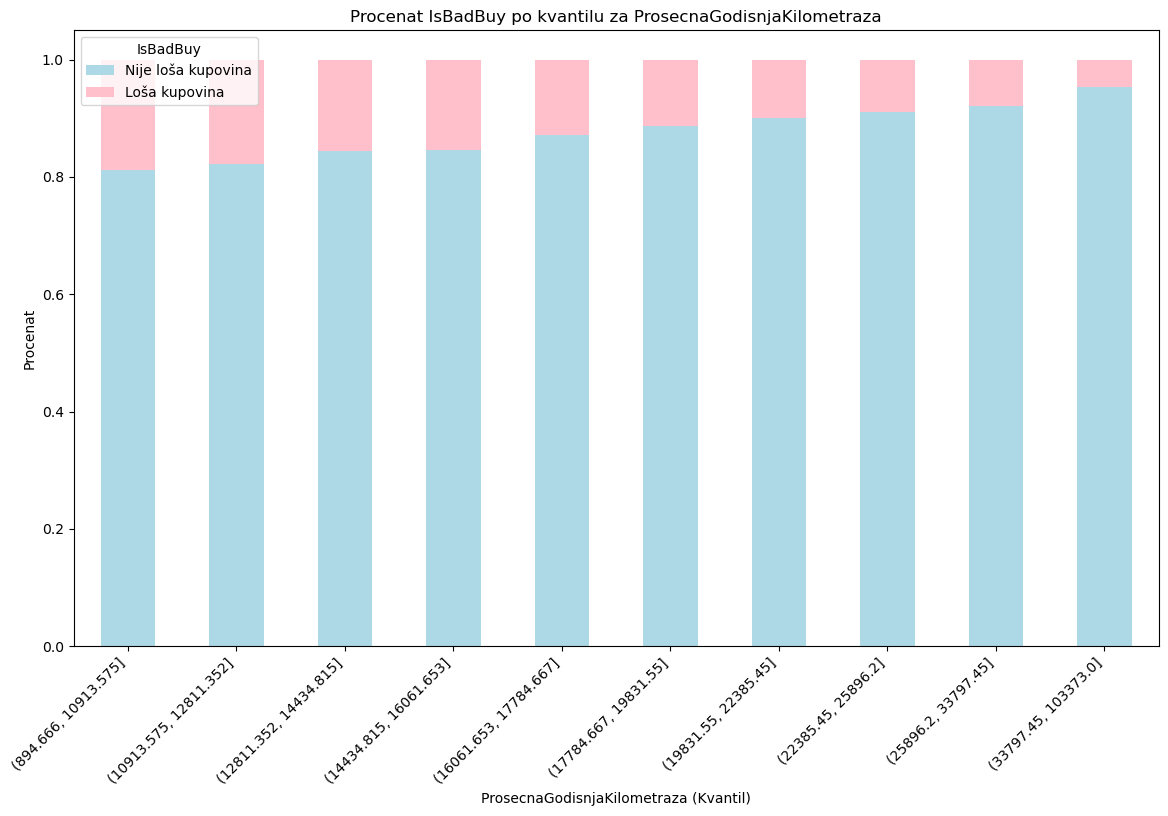

In [127]:
plot_quantile_bin_percentage(df,'ProsecnaGodisnjaKilometraza',10,'IsBadBuy')

Kontingentna tabela sa brojem instanci:
IsBadBuy           0     1  Total Instances
QuantileBin                                
(-0.001, 2.0]   7638   473             8111
(2.0, 3.0]     10227   894            11121
(3.0, 4.0]     10650  1281            11931
(4.0, 5.0]      7749  1353             9102
(5.0, 6.0]      4608  1041             5649
(6.0, 7.0]      2492   695             3187
(7.0, 9.0]      1431   556             1987
Procenat po binu:
IsBadBuy              0         1
QuantileBin                      
(-0.001, 2.0]  0.941684  0.058316
(2.0, 3.0]     0.919612  0.080388
(3.0, 4.0]     0.892633  0.107367
(4.0, 5.0]     0.851351  0.148649
(5.0, 6.0]     0.815720  0.184280
(6.0, 7.0]     0.781927  0.218073
(7.0, 9.0]     0.720181  0.279819


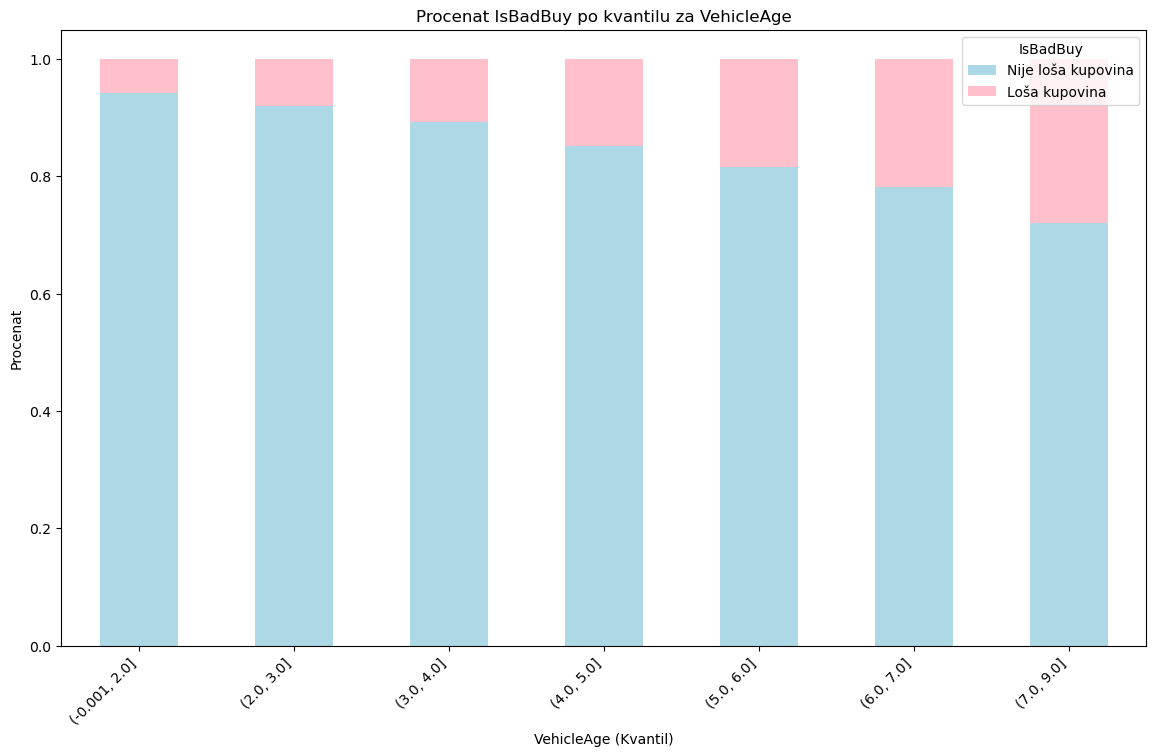

In [128]:
plot_quantile_bin_percentage(df,'VehicleAge',10,'IsBadBuy')

Kontingentna tabela sa brojem instanci:
IsBadBuy              0     1  Total Instances
QuantileBin                                   
(0.999, 4425.0]    3929  1181             5110
(4425.0, 5160.0]   4230   881             5111
(5160.0, 5700.0]   4570   711             5281
(5700.0, 6195.0]   4338   602             4940
(6195.0, 6725.0]   4629   536             5165
(6725.0, 7230.0]   4570   502             5072
(7230.0, 7685.0]   4672   446             5118
(7685.0, 8180.0]   4660   430             5090
(8180.0, 8975.0]   4638   456             5094
(8975.0, 38785.0]  4559   548             5107
Procenat po binu:
IsBadBuy                  0         1
QuantileBin                          
(0.999, 4425.0]    0.768885  0.231115
(4425.0, 5160.0]   0.827627  0.172373
(5160.0, 5700.0]   0.865366  0.134634
(5700.0, 6195.0]   0.878138  0.121862
(6195.0, 6725.0]   0.896225  0.103775
(6725.0, 7230.0]   0.901025  0.098975
(7230.0, 7685.0]   0.912857  0.087143
(7685.0, 8180.0]   0.915521  0.08447

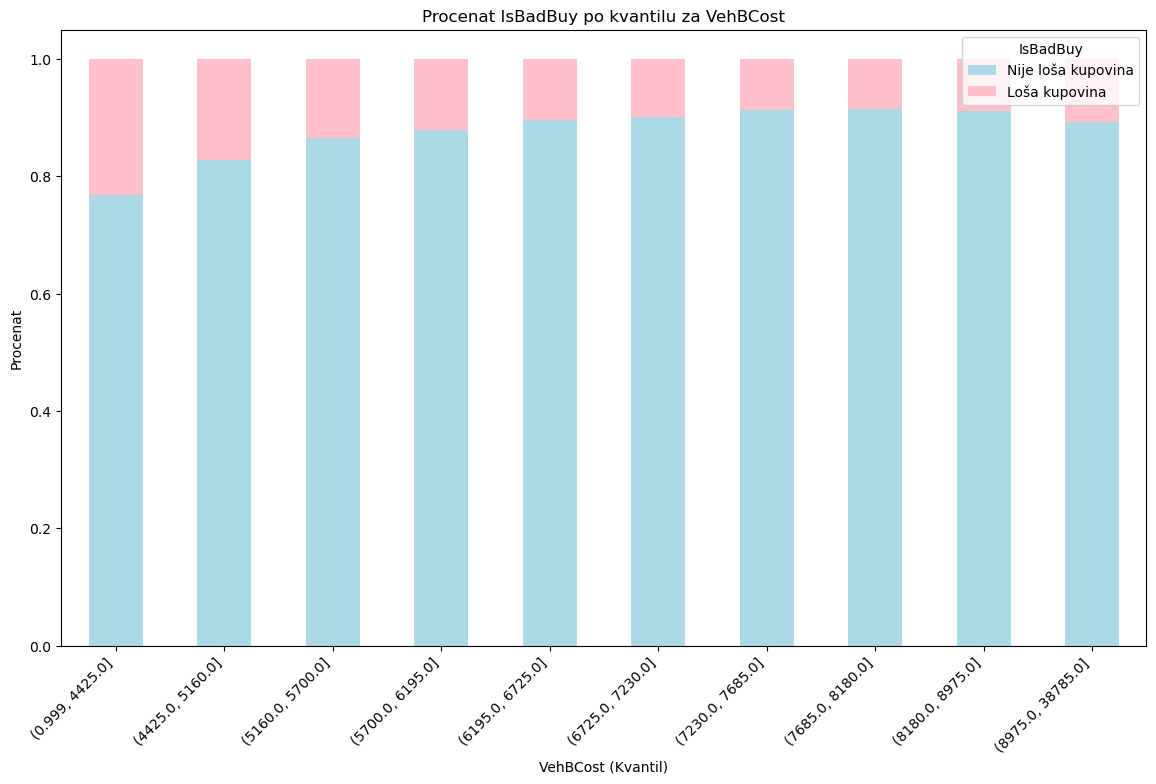

In [129]:
plot_quantile_bin_percentage(df,'VehBCost',10,'IsBadBuy')

Plot za TrimCategory: Mid-Range
Kontingentna tabela sa brojem instanci:
IsBadBuy                0    1  Total Instances
QuantileBin                                    
(4824.999, 63157.0]  3108  300             3408
(63157.0, 71964.0]   3080  327             3407
(71964.0, 78468.0]   3030  377             3407
(78468.0, 85161.0]   3005  402             3407
(85161.0, 112029.0]  2969  438             3407
Procenat po binu:
IsBadBuy                    0         1
QuantileBin                            
(4824.999, 63157.0]  0.911972  0.088028
(63157.0, 71964.0]   0.904021  0.095979
(71964.0, 78468.0]   0.889345  0.110655
(78468.0, 85161.0]   0.882008  0.117992
(85161.0, 112029.0]  0.871441  0.128559


C:\Users\Milutin\AppData\Local\Temp\ipykernel_31256\2884149299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')


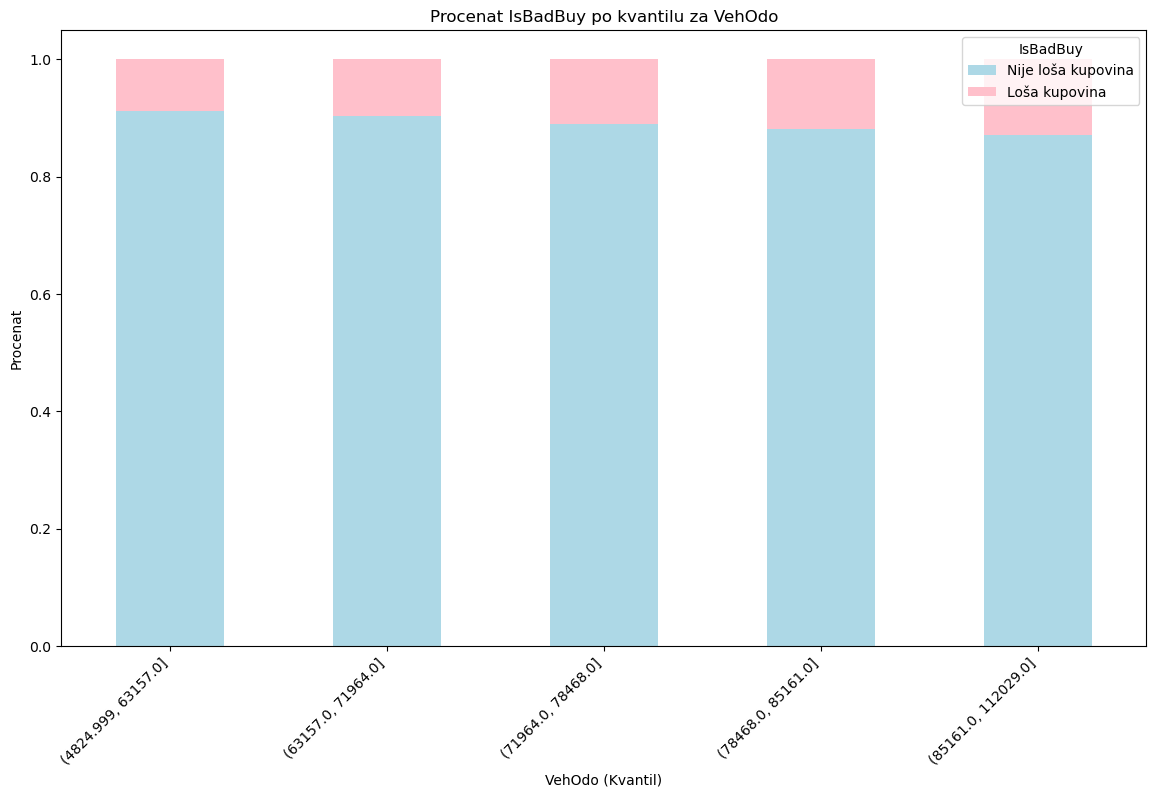

Plot za TrimCategory: Basic
Kontingentna tabela sa brojem instanci:
IsBadBuy                0    1  Total Instances
QuantileBin                                    
(5367.999, 55156.0]  5074  444             5518
(55156.0, 66997.0]   4937  581             5518
(66997.0, 75389.0]   4852  664             5516
(75389.0, 83445.0]   4766  751             5517
(83445.0, 115026.0]  4562  955             5517
Procenat po binu:
IsBadBuy                    0         1
QuantileBin                            
(5367.999, 55156.0]  0.919536  0.080464
(55156.0, 66997.0]   0.894708  0.105292
(66997.0, 75389.0]   0.879623  0.120377
(75389.0, 83445.0]   0.863875  0.136125
(83445.0, 115026.0]  0.826899  0.173101


C:\Users\Milutin\AppData\Local\Temp\ipykernel_31256\2884149299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')


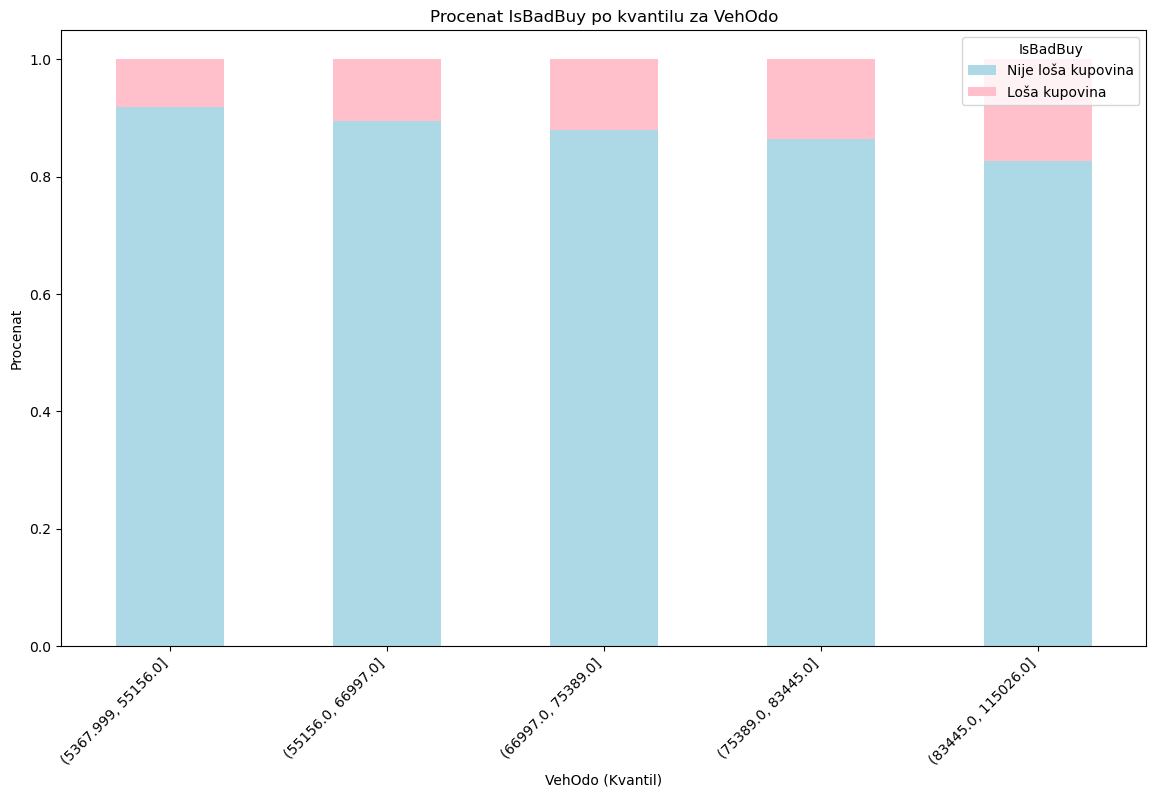

Plot za TrimCategory: Unknown
Kontingentna tabela sa brojem instanci:
IsBadBuy                0   1  Total Instances
QuantileBin                                   
(10094.999, 50998.6]  363  49              412
(50998.6, 63551.2]    352  60              412
(63551.2, 73129.6]    341  70              411
(73129.6, 81996.0]    336  76              412
(81996.0, 115717.0]   330  82              412
Procenat po binu:
IsBadBuy                     0         1
QuantileBin                             
(10094.999, 50998.6]  0.881068  0.118932
(50998.6, 63551.2]    0.854369  0.145631
(63551.2, 73129.6]    0.829684  0.170316
(73129.6, 81996.0]    0.815534  0.184466
(81996.0, 115717.0]   0.800971  0.199029


C:\Users\Milutin\AppData\Local\Temp\ipykernel_31256\2884149299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')


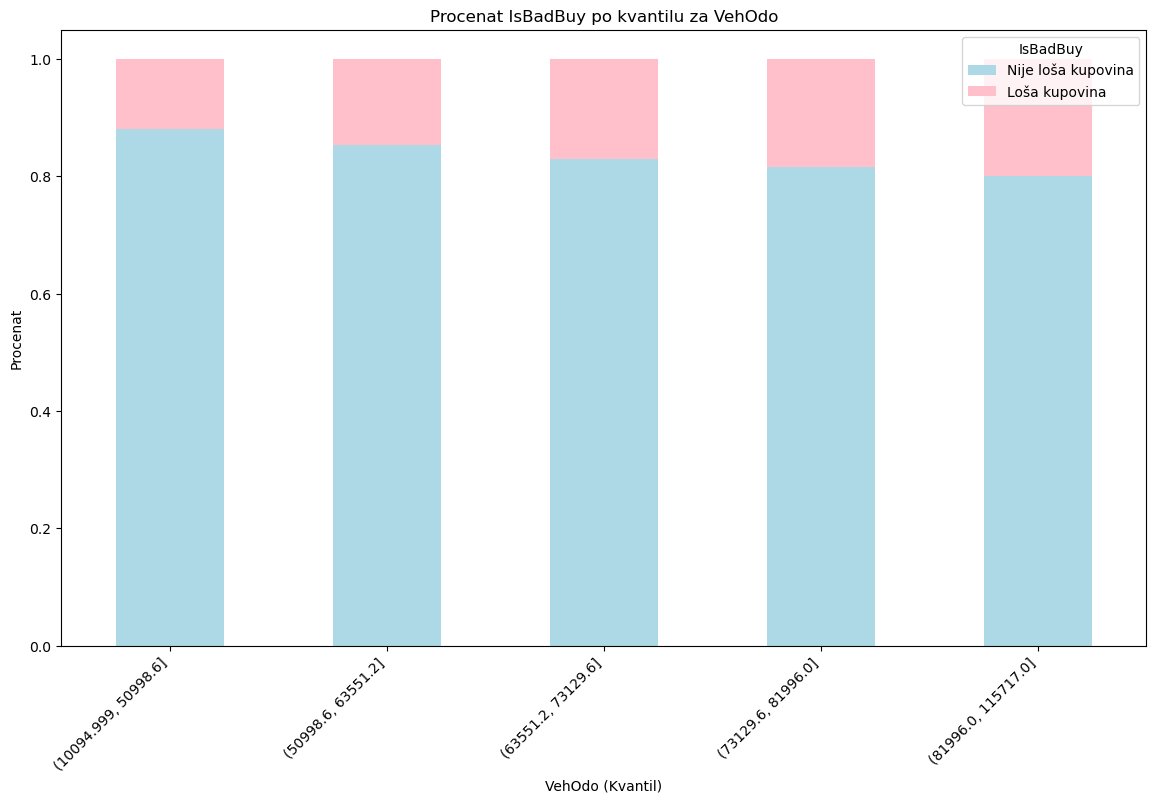

Plot za TrimCategory: Sport
Kontingentna tabela sa brojem instanci:
IsBadBuy                0    1  Total Instances
QuantileBin                                    
(11661.999, 63642.6]  419   58              477
(63642.6, 72740.6]    411   66              477
(72740.6, 79609.6]    397   79              476
(79609.6, 86500.0]    400   78              478
(86500.0, 110071.0]   376  100              476
Procenat po binu:
IsBadBuy                     0         1
QuantileBin                             
(11661.999, 63642.6]  0.878407  0.121593
(63642.6, 72740.6]    0.861635  0.138365
(72740.6, 79609.6]    0.834034  0.165966
(79609.6, 86500.0]    0.836820  0.163180
(86500.0, 110071.0]   0.789916  0.210084


C:\Users\Milutin\AppData\Local\Temp\ipykernel_31256\2884149299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')


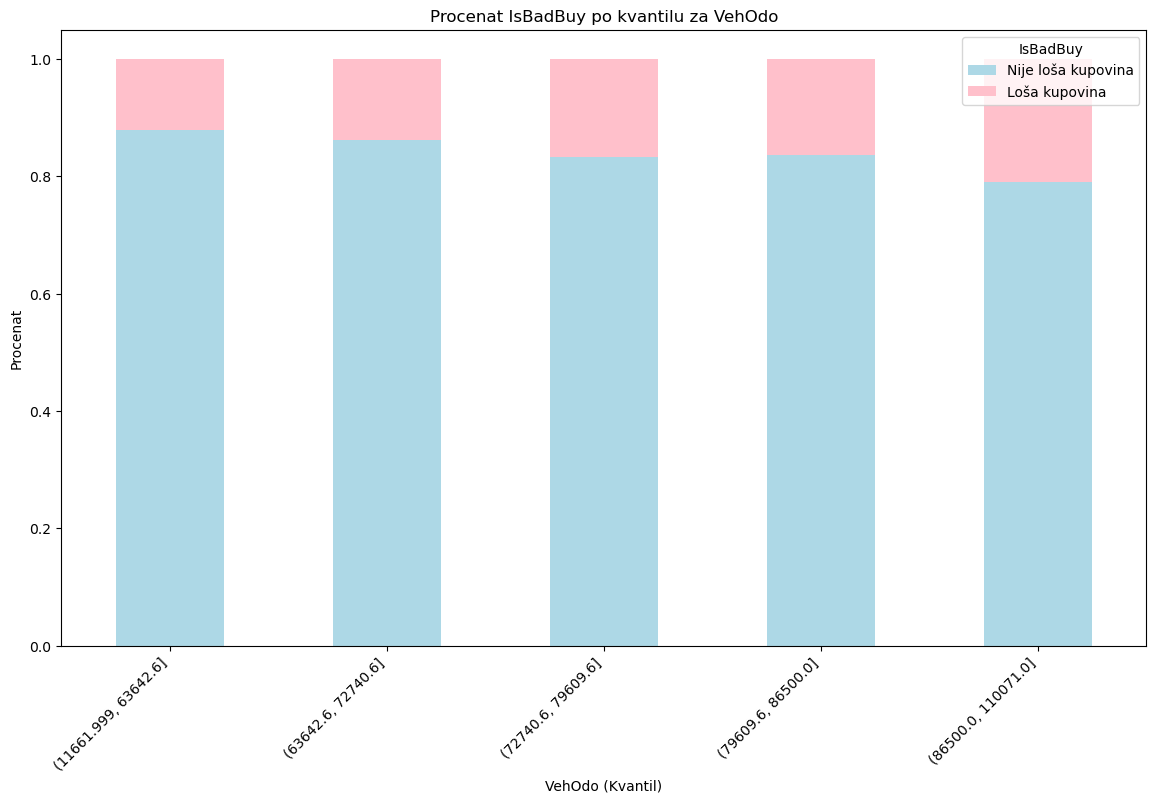

Plot za TrimCategory: Special
Kontingentna tabela sa brojem instanci:
IsBadBuy                0   1  Total Instances
QuantileBin                                   
(24208.999, 67628.2]  103  10              113
(67628.2, 75901.2]     93  19              112
(75901.2, 82740.6]     90  23              113
(82740.6, 87797.2]     90  22              112
(87797.2, 107395.0]    88  25              113
Procenat po binu:
IsBadBuy                     0         1
QuantileBin                             
(24208.999, 67628.2]  0.911504  0.088496
(67628.2, 75901.2]    0.830357  0.169643
(75901.2, 82740.6]    0.796460  0.203540
(82740.6, 87797.2]    0.803571  0.196429
(87797.2, 107395.0]   0.778761  0.221239


C:\Users\Milutin\AppData\Local\Temp\ipykernel_31256\2884149299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')


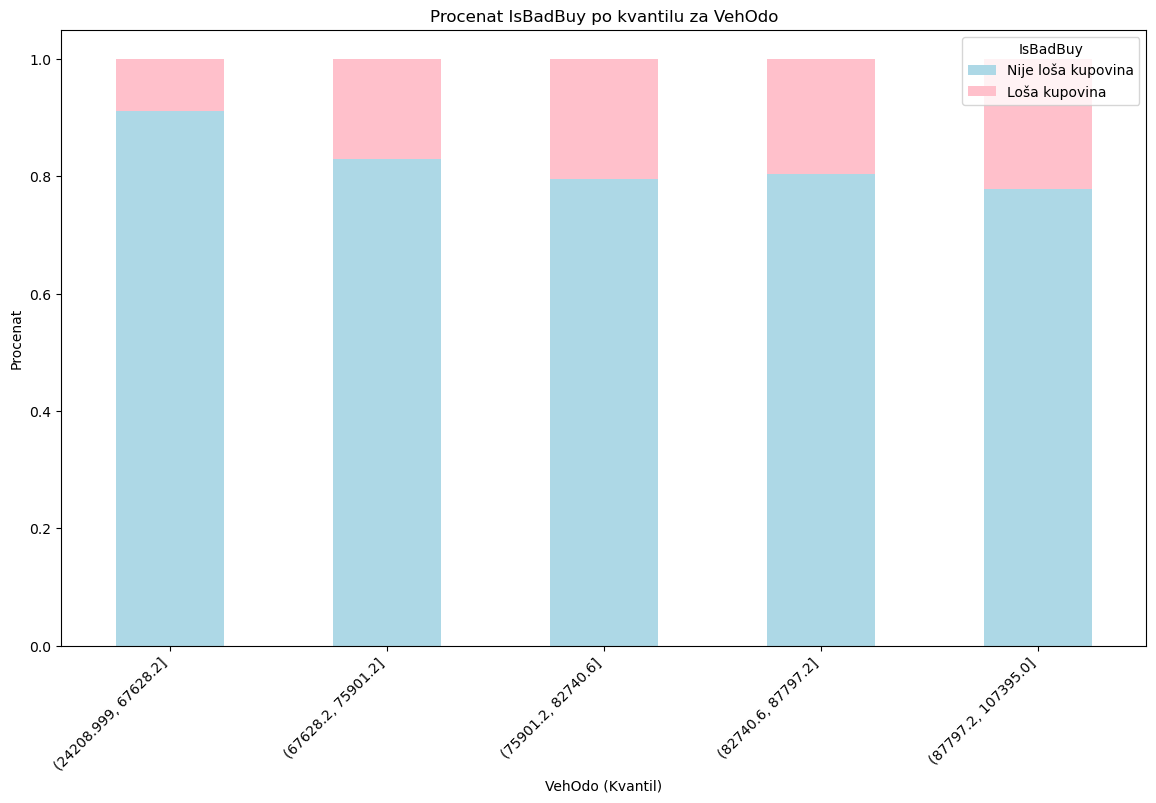

Plot za TrimCategory: Luxury
Kontingentna tabela sa brojem instanci:
IsBadBuy                0   1  Total Instances
QuantileBin                                   
(17501.999, 67123.6]  255  37              292
(67123.6, 74989.2]    254  38              292
(74989.2, 81341.0]    237  55              292
(81341.0, 87397.6]    237  55              292
(87397.6, 103794.0]   240  52              292
Procenat po binu:
IsBadBuy                     0         1
QuantileBin                             
(17501.999, 67123.6]  0.873288  0.126712
(67123.6, 74989.2]    0.869863  0.130137
(74989.2, 81341.0]    0.811644  0.188356
(81341.0, 87397.6]    0.811644  0.188356
(87397.6, 103794.0]   0.821918  0.178082


C:\Users\Milutin\AppData\Local\Temp\ipykernel_31256\2884149299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['QuantileBin'] = pd.qcut(df[column_name], q=quantiles, duplicates='drop')


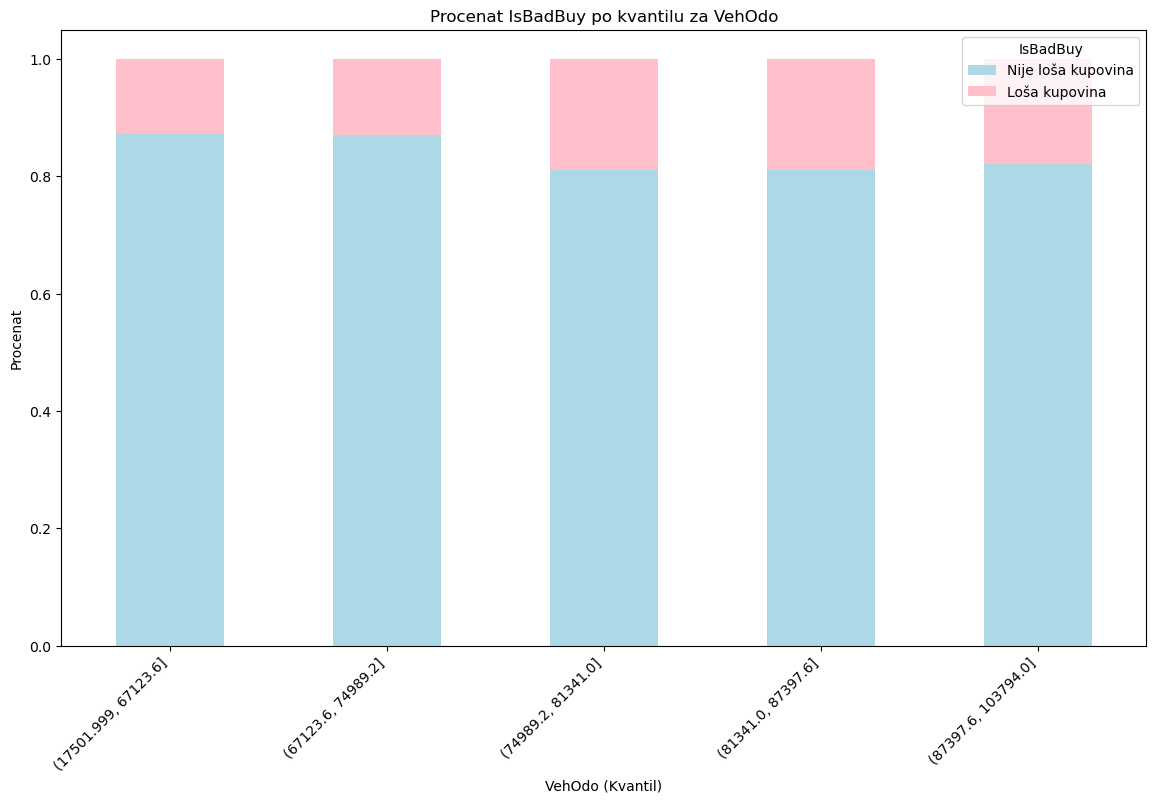

In [134]:
trim_categories = df['TrimCategory'].unique()

for trim in trim_categories:
    print(f"Plot za TrimCategory: {trim}")
    # Filtriraj DataFrame za trenutnu vrednost 'TrimCategory'
    df_trim = df[df['TrimCategory'] == trim]
    
    # Pozovi funkciju za trenutni filtrirani DataFrame
    plot_quantile_bin_percentage(df_trim, 'VehOdo', 5, 'IsBadBuy')